In [1]:
import numpy as np
import random as rd
import tensorflow as tf

from keras.layers import Dense, Embedding, Flatten, Input, concatenate
from keras.models import Model
from keras.optimizers import Adagrad
from keras.constraints import max_norm, non_neg, min_max_norm, unit_norm

#Import another jupyter notebook
import import_ipynb
from Productive_CrossValidation_inclTest import *
from Productive_Data_GetTrainTest import samEval

C:\Users\twitter\Anaconda3\lib\site-packages\h5py\__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


importing Jupyter notebook from Productive_CrossValidation_inclTest.ipynb
importing Jupyter notebook from Productive_TimeHistory.ipynb
importing Jupyter notebook from Productive_Data_GetTrainTest.ipynb


In [2]:
#for reproducability of the results
seed = 7
np.random.seed(seed)
tf.set_random_seed(seed)
rd.seed(seed)

In [3]:
path = 'data/'
outputpath ='outputs/05_constraints_samEval2018/'

In [4]:
#Load necessary data
train_data, train_labels, test_data, test_labels, word_index, MAX_SEQUENCE_LENGTH = samEval()

In [5]:
#Load pretrained embeddings
import gensim
from gensim.models import KeyedVectors

#Pretrained Google News Embeddings, Dimension 300
GOOGLEEMB = path + 'GoogleNews-vectors-negative300.bin'

embedding= KeyedVectors.load_word2vec_format(GOOGLEEMB, binary=True)

word_vectors = embedding.wv

C:\Users\twitter\Anaconda3\lib\site-packages\smart_open\smart_open_lib.py:398: UserWarning: This function is deprecated, use smart_open.open instead. See the migration notes for details: https://github.com/RaRe-Technologies/smart_open/blob/master/README.rst#migrating-to-the-new-open-function
  'See the migration notes for details: %s' % _MIGRATION_NOTES_URL
C:\Users\twitter\Anaconda3\lib\site-packages\ipykernel_launcher.py:10: DeprecationWarning: Call to deprecated `wv` (Attribute will be removed in 4.0.0, use self instead).
  # Remove the CWD from sys.path while we load stuff.


In [6]:
#Create embedding-matrix, serves the Keras Embedding Layer as weigths
EMBEDDING_DIM=300

embedding_matrix = np.zeros((len(word_index)+1, EMBEDDING_DIM))

for word, i in word_index.items():
    try:
        embedding_vector = word_vectors[word]
        embedding_matrix[i] = embedding_vector   
    except:
        # words not found in embeddings will be zero
        pass

In [7]:
#Load POS data
def get_pos(file):
    pos =[]
    with open(file, 'r') as f:
        for line in f:
            pos.append([int(i) for i in line.split(',')])
    pos= np.asarray(pos)
    return pos

train_pos =get_pos('output_trainTestData/SamEval_train_pos.csv')
test_pos = get_pos('output_trainTestData/SamEval_test_pos.csv')

In [8]:
#Load Sentiment data
def get_sentiment(file):
    senti =[]
    with open(file, 'r') as f:
        for line in f:
            senti.append([float(i) for i in line.split(',')])
    senti= np.asarray(senti)
    return senti

train_senti_blob =get_sentiment('output_trainTestData/SamEval_train_data_sentiment_blob.csv')
test_senti_blob = get_sentiment('output_trainTestData/SamEval_test_data_sentiment_blob.csv')

### Hyperparameter for all models

In [9]:
BATCH_SIZE = 64
NUM_EPOCHS = 30
softmax = True
lossfunction ='binary_crossentropy'
optimizer = Adagrad(lr=0.001)

Instructions for updating:
Colocations handled automatically by placer.


### Non negative

In [16]:
#First part
wv_layer_nonneg = Embedding(len(word_index)+1,
                 EMBEDDING_DIM,
                 weights=[embedding_matrix],
                 input_length=MAX_SEQUENCE_LENGTH,
                 trainable=True)

comment_input_nonneg = Input(shape=(MAX_SEQUENCE_LENGTH,), dtype='float32')
embedded_sequences_nonneg = wv_layer_nonneg(comment_input_nonneg)
x_first_nonneg = Dense(600, activation='relu', kernel_constraint = non_neg())(embedded_sequences_nonneg)
x_first_nonneg = Flatten()(x_first_nonneg)

#Second part
senti_input_nonneg_blob = Input(shape=(MAX_SEQUENCE_LENGTH,), dtype='float')
x_second_nonneg = Dense(600, activation='relu', kernel_constraint = non_neg())(senti_input_nonneg_blob)

#Thrid part
senti_input_nonneg_pos = Input(shape=(MAX_SEQUENCE_LENGTH,), dtype='float')
x_third_nonneg = Dense(600, activation='relu', kernel_constraint = non_neg())(senti_input_nonneg_pos)

#Concatination
concat_nonneg = concatenate([x_first_nonneg, x_second_nonneg, x_third_nonneg])

preds_nonneg = Dense(2, activation='softmax')(concat_nonneg)

model_nonneg = Model(inputs=[comment_input_nonneg, senti_input_nonneg_blob, senti_input_nonneg_pos], outputs=preds_nonneg)
model_nonneg.summary()

__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_12 (InputLayer)           (None, 40)           0                                            
__________________________________________________________________________________________________
embedding_6 (Embedding)         (None, 40, 300)      4118700     input_12[0][0]                   
__________________________________________________________________________________________________
dense_8 (Dense)                 (None, 40, 600)      180600      embedding_6[0][0]                
__________________________________________________________________________________________________
input_13 (InputLayer)           (None, 40)           0                                            
__________________________________________________________________________________________________
input_14 (

Instructions for updating:
Use tf.cast instead.

-----Fold 1--------


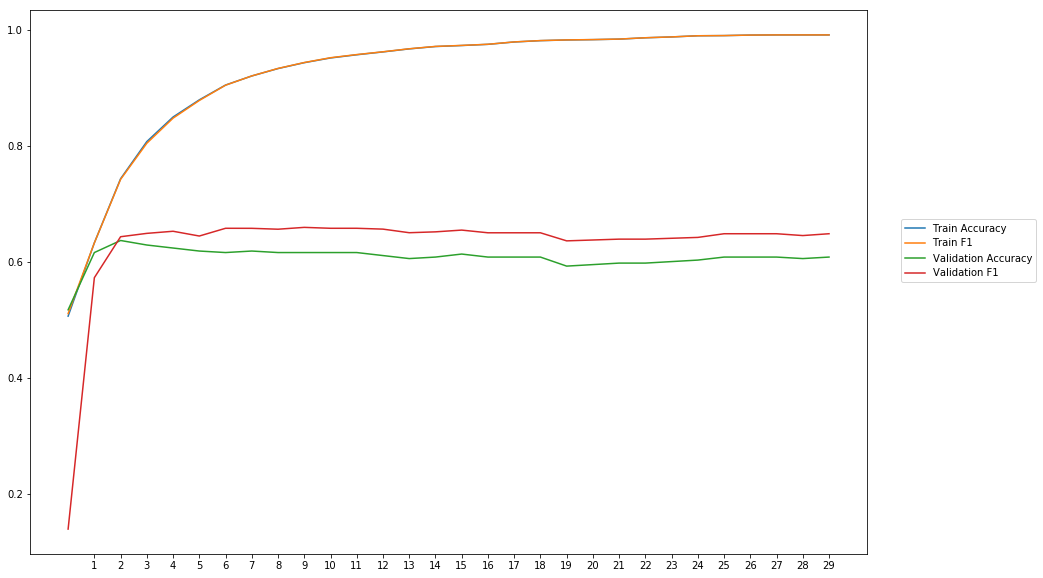

Average Accuracy: 60.72%
Average Precision: 59.24%
Average Recall: 69.34%
Average F1: 62.91%

-----Fold 2--------


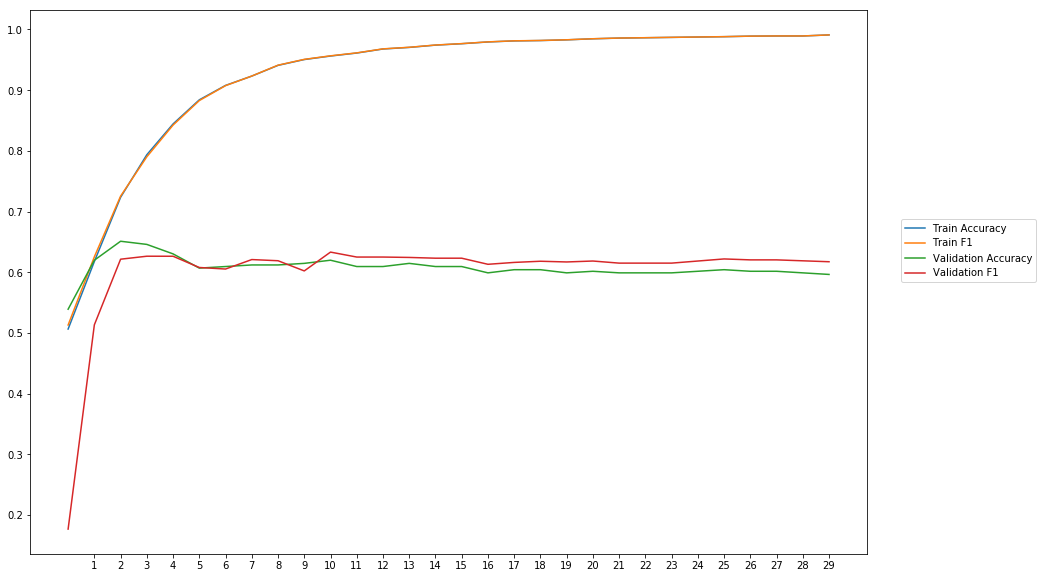

Average Accuracy: 60.74%
Average Precision: 61.22%
Average Recall: 61.19%
Average F1: 60.06%

-----Fold 3--------


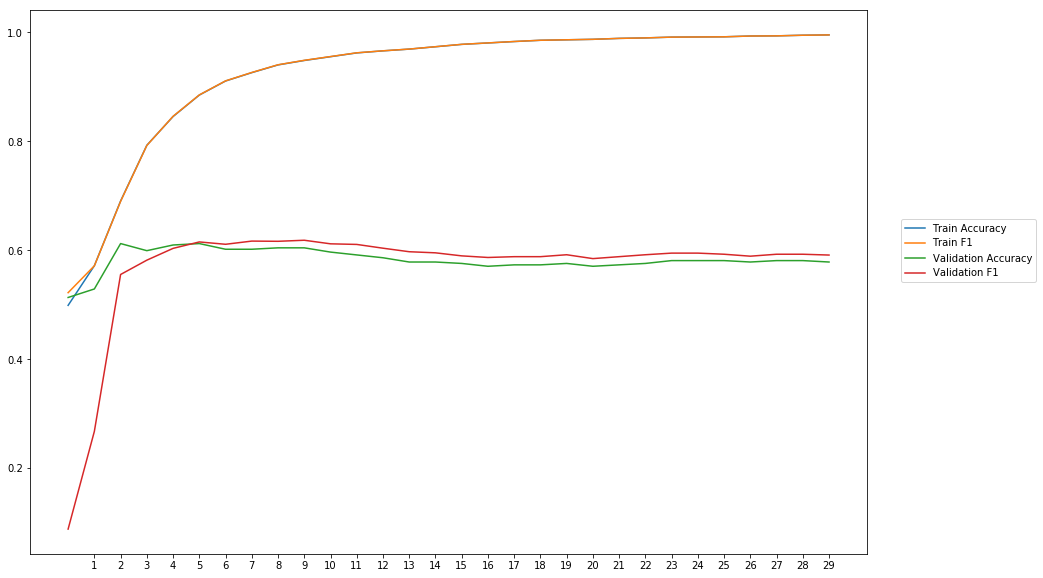

Average Accuracy: 58.20%
Average Precision: 58.29%
Average Recall: 58.03%
Average F1: 56.81%

-----Fold 4--------


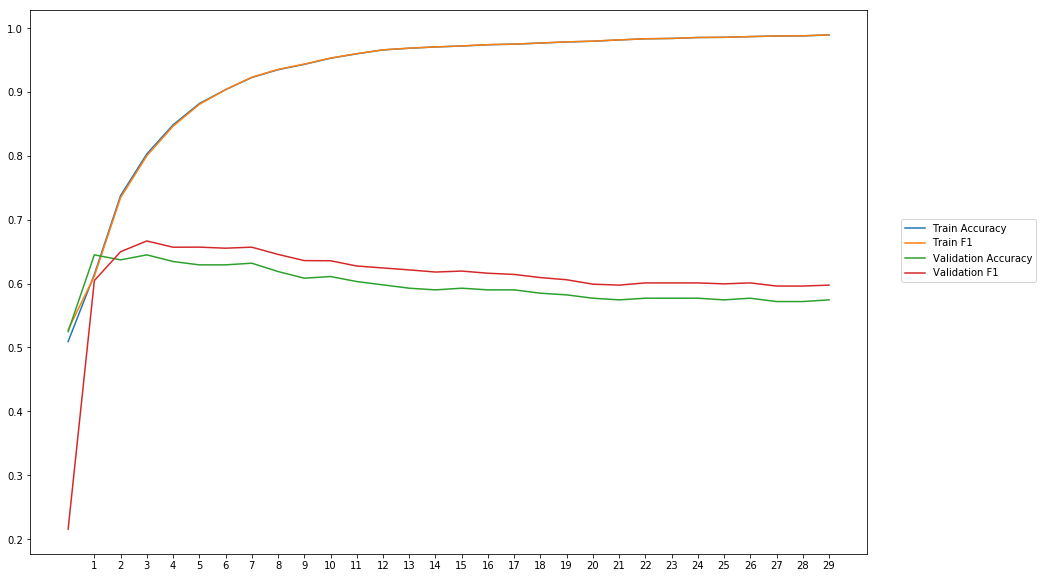

Average Accuracy: 59.63%
Average Precision: 58.86%
Average Recall: 64.21%
Average F1: 60.75%

-----Fold 5--------


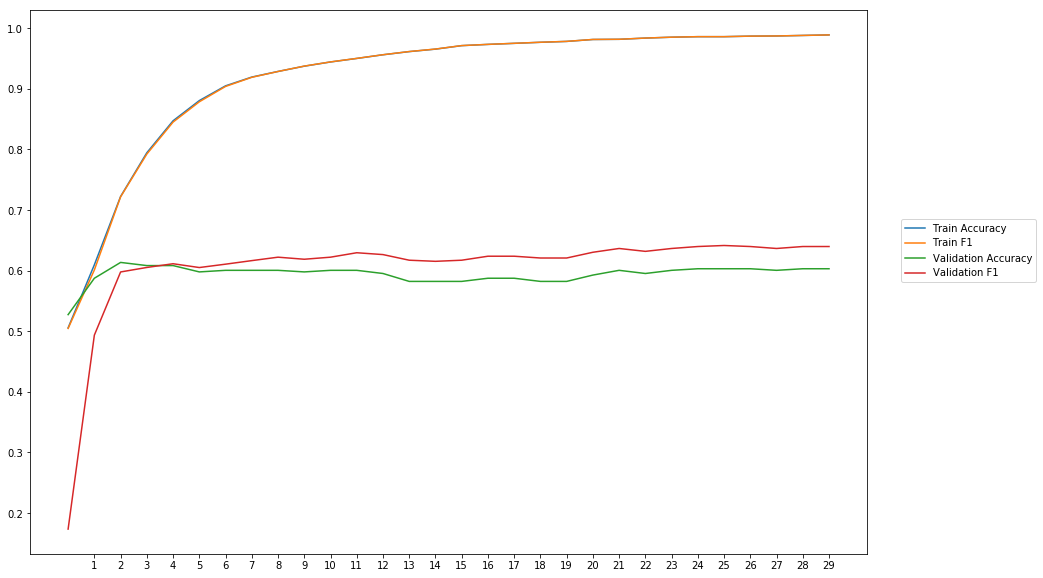

Average Accuracy: 59.43%
Average Precision: 58.89%
Average Recall: 64.42%
Average F1: 60.48%

-----Fold 6--------


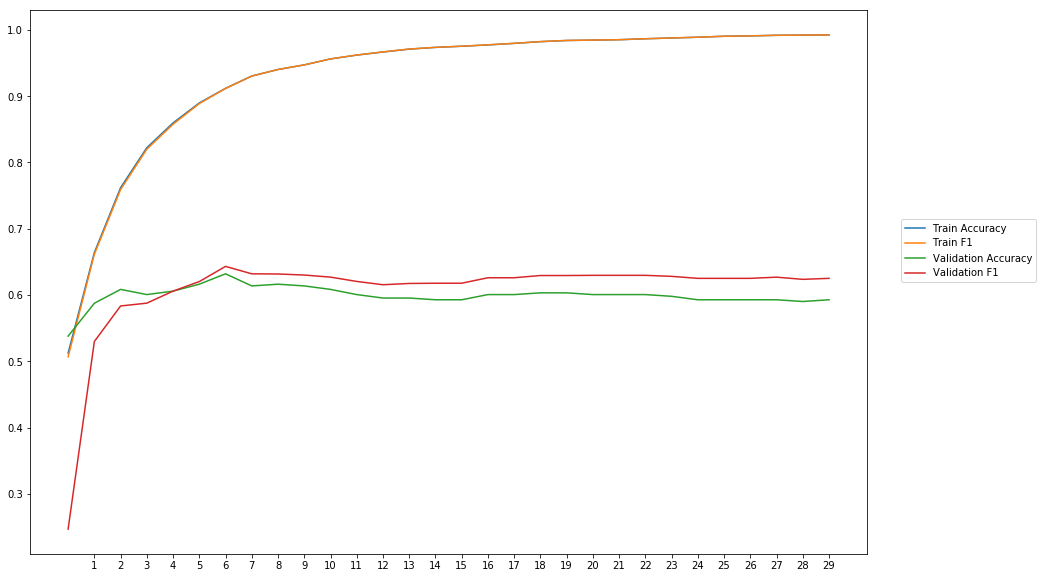

Average Accuracy: 59.92%
Average Precision: 59.41%
Average Recall: 63.54%
Average F1: 60.67%

-----Fold 7--------


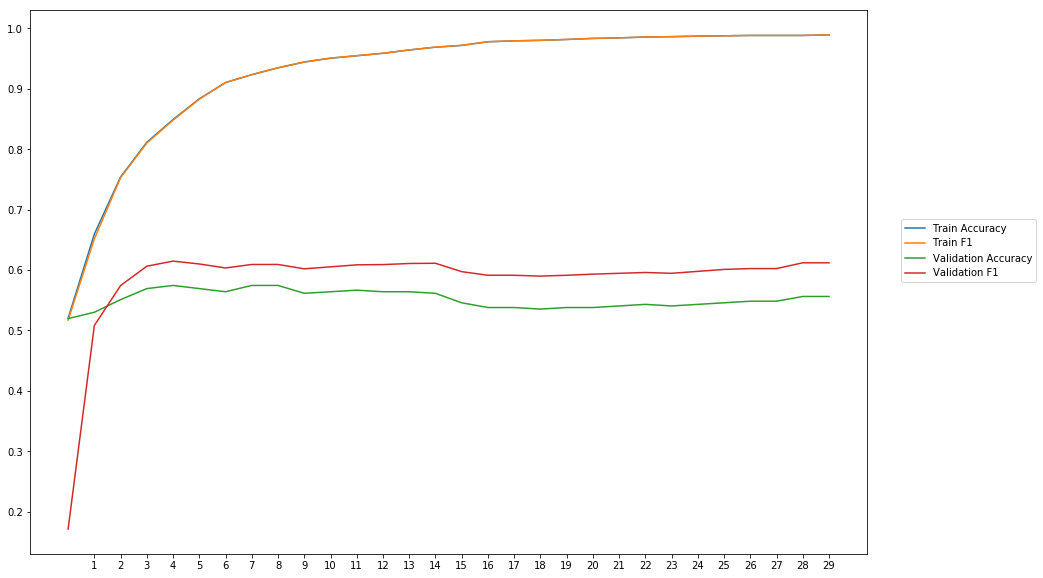

Average Accuracy: 55.20%
Average Precision: 54.47%
Average Recall: 64.92%
Average F1: 58.39%

-----Fold 8--------


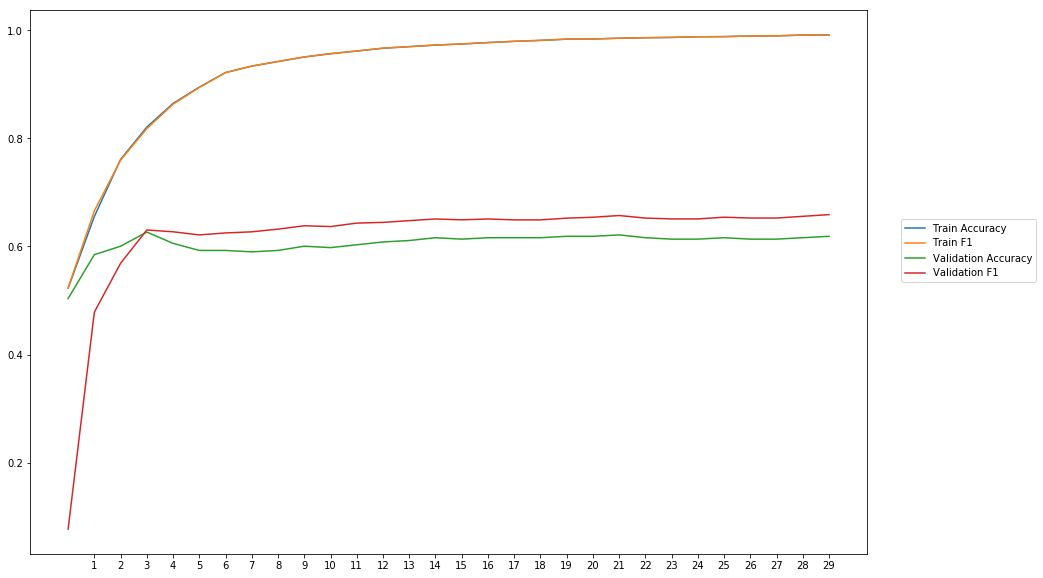

Average Accuracy: 60.57%
Average Precision: 59.17%
Average Recall: 67.09%
Average F1: 61.80%

-----Fold 9--------


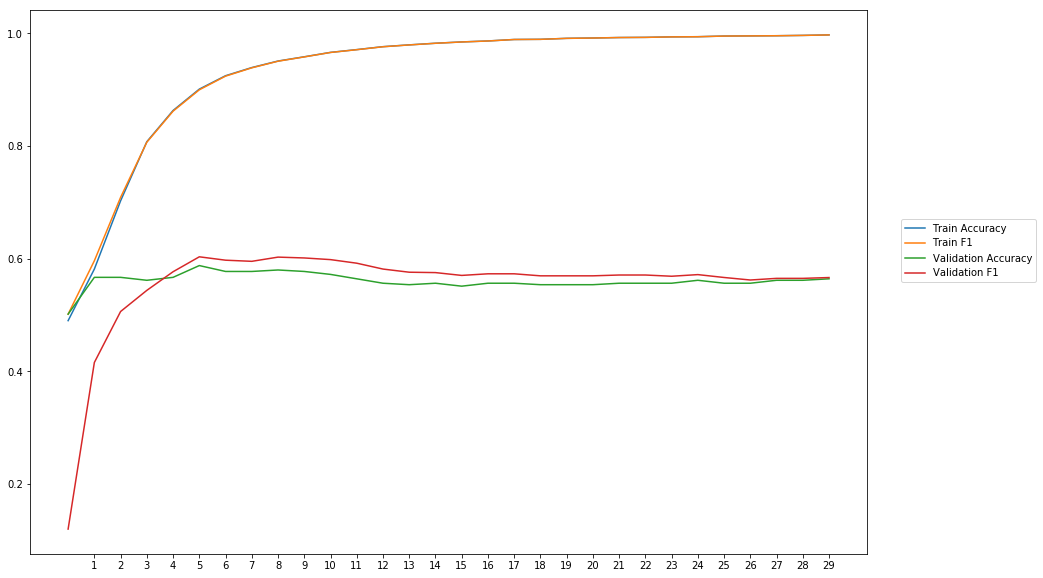

Average Accuracy: 56.05%
Average Precision: 55.85%
Average Recall: 56.60%
Average F1: 55.37%

-----Fold 10--------


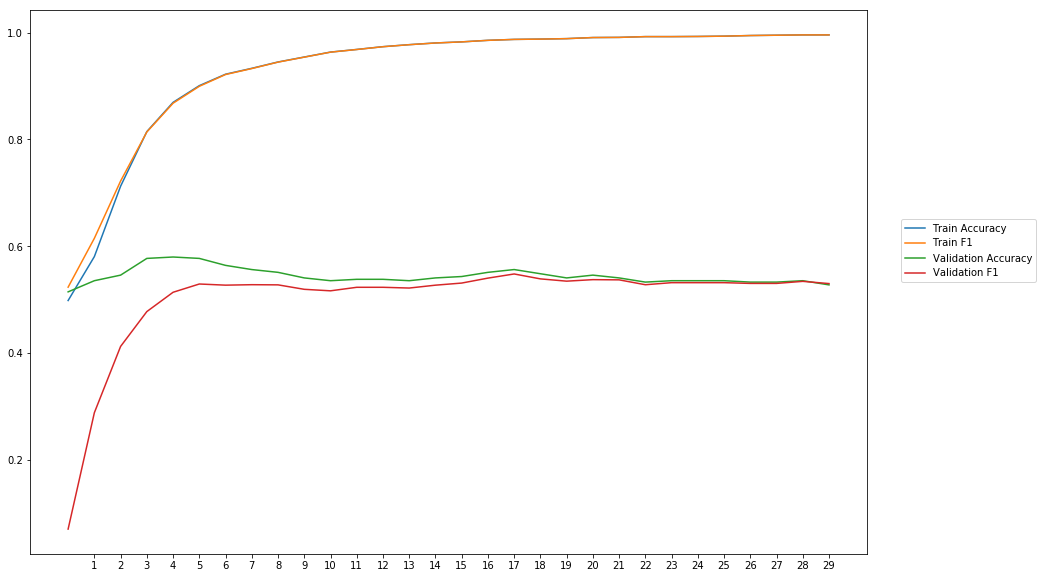

Average Accuracy: 54.40%
Average Precision: 56.01%
Average Recall: 47.71%
Average F1: 50.05%

-------Overallresults-------


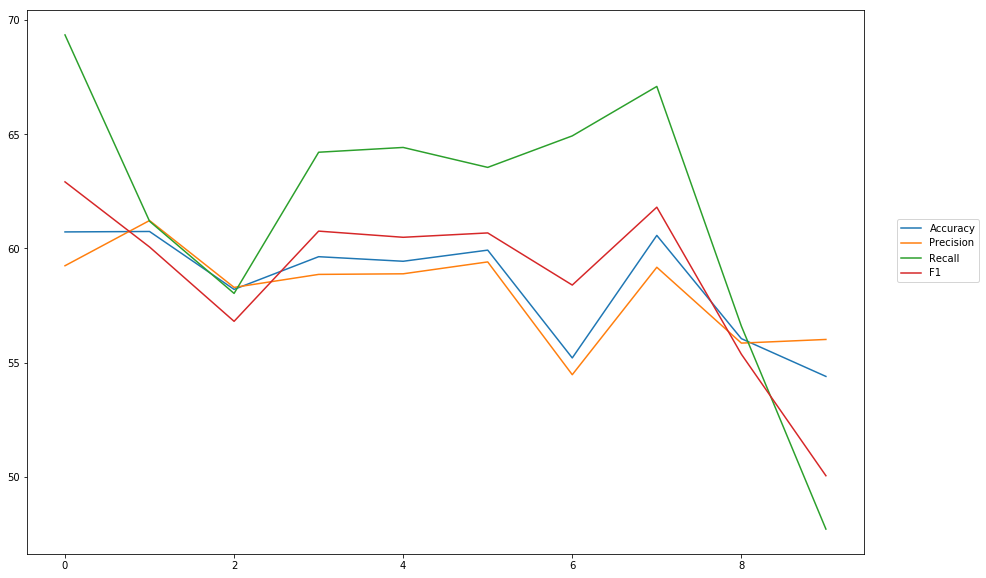

Accuracy: Mean = 58.49% (+/- 2.28%), Max = 60.74%, Min =  54.40%
Precision: Mean = 58.14% (+/- 1.94%), Max = 61.22%, Min =  54.47%
Recall: Mean = 61.70% (+/- 5.92%), Max = 69.34%, Min =  47.71%
F1: Mean = 58.73% (+/- 3.61%), Max = 62.91%, Min =  50.05%


In [17]:
cross_val_three_inputs(model_nonneg, NUM_EPOCHS, BATCH_SIZE, optimizer, lossfunction, train_data, train_senti_blob, train_pos, train_labels, softmax, outputpath, 'NoneNegative')

### MinMaxNorm

In [10]:
#First part
wv_layer_minmax = Embedding(len(word_index)+1,
                 EMBEDDING_DIM,
                 weights=[embedding_matrix],
                 input_length=MAX_SEQUENCE_LENGTH,
                 trainable=True)

comment_input_minmax = Input(shape=(MAX_SEQUENCE_LENGTH,), dtype='float32')
embedded_sequences_minmax = wv_layer_minmax(comment_input_minmax)
x_first_minmax = Dense(600, activation='relu', kernel_constraint=min_max_norm())(embedded_sequences_minmax)
x_first_minmax = Flatten()(x_first_minmax)

#Second part
senti_input_minmax_blob = Input(shape=(MAX_SEQUENCE_LENGTH,), dtype='float')
x_second_minmax = Dense(600, activation='relu', kernel_constraint=min_max_norm())(senti_input_minmax_blob)

#Thrid part
senti_input_minmax_pos = Input(shape=(MAX_SEQUENCE_LENGTH,), dtype='float')
x_third_minmax = Dense(600, activation='relu', kernel_constraint=min_max_norm())(senti_input_minmax_pos)

#Concatination
concat_minmax = concatenate([x_first_minmax, x_second_minmax, x_third_minmax])

preds_minmax = Dense(2, activation='softmax')(concat_minmax)

model_minmax = Model(inputs=[comment_input_minmax, senti_input_minmax_blob, senti_input_minmax_pos], outputs=preds_minmax)
model_minmax.summary()

__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            (None, 40)           0                                            
__________________________________________________________________________________________________
embedding_1 (Embedding)         (None, 40, 300)      4118700     input_1[0][0]                    
__________________________________________________________________________________________________
dense_1 (Dense)                 (None, 40, 600)      180600      embedding_1[0][0]                
__________________________________________________________________________________________________
input_2 (InputLayer)            (None, 40)           0                                            
__________________________________________________________________________________________________
input_3 (I


-----Fold 1--------


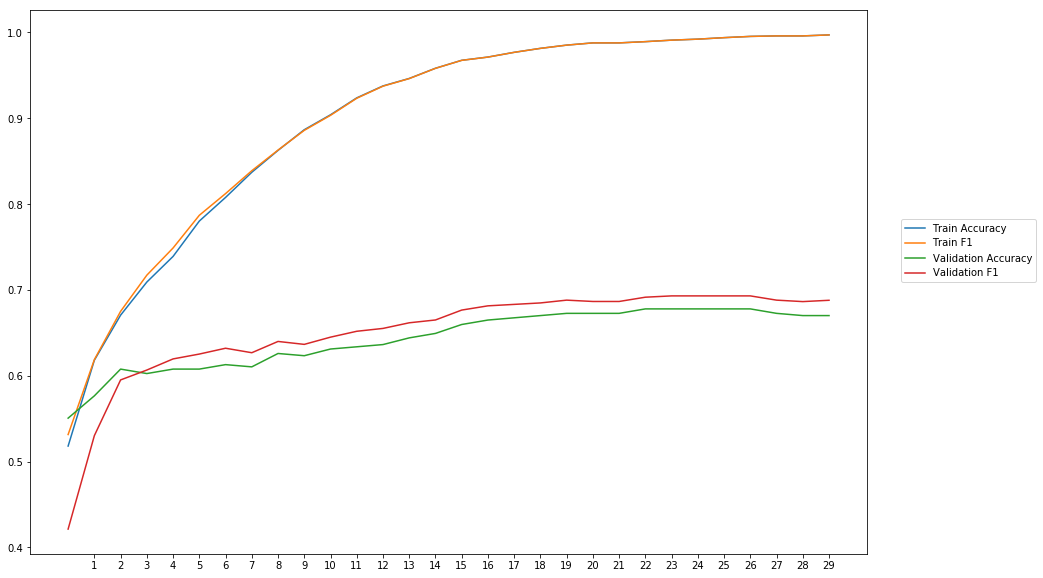

Average Accuracy: 64.35%
Average Precision: 63.25%
Average Recall: 67.48%
Average F1: 65.09%

-----Fold 2--------


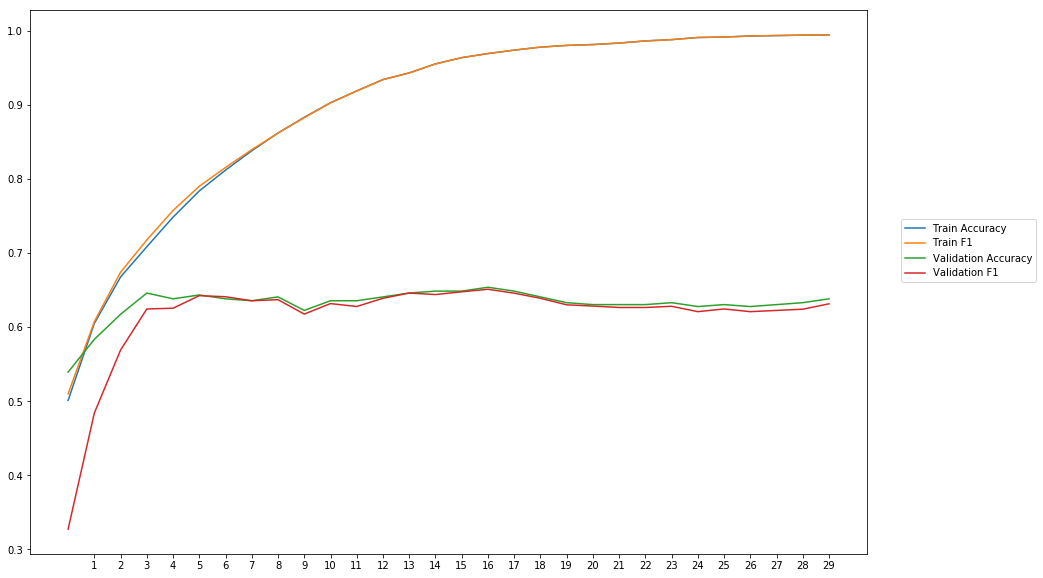

Average Accuracy: 63.14%
Average Precision: 63.61%
Average Recall: 60.24%
Average F1: 61.52%

-----Fold 3--------


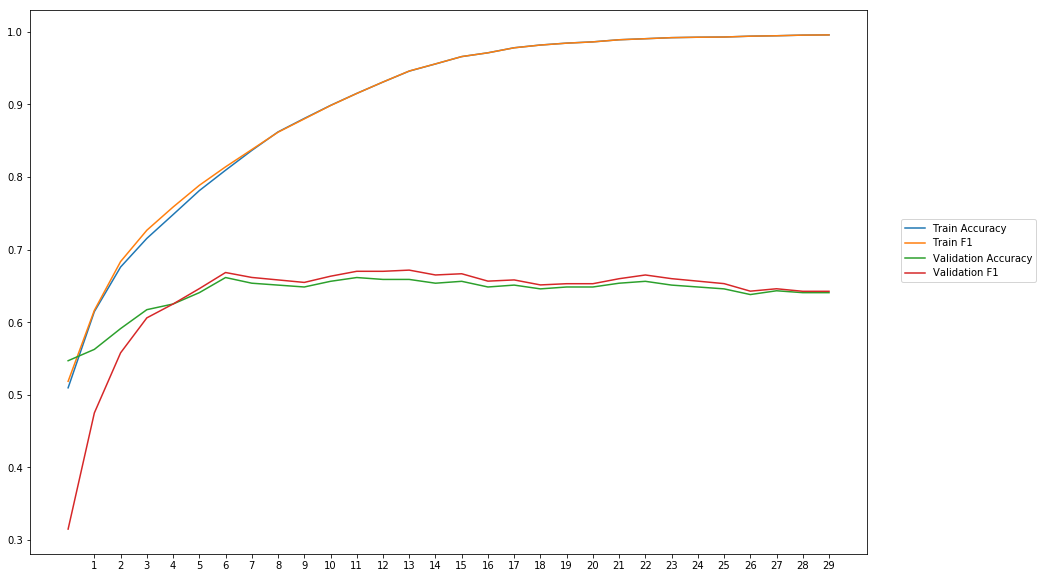

Average Accuracy: 64.01%
Average Precision: 63.67%
Average Recall: 64.03%
Average F1: 63.38%

-----Fold 4--------


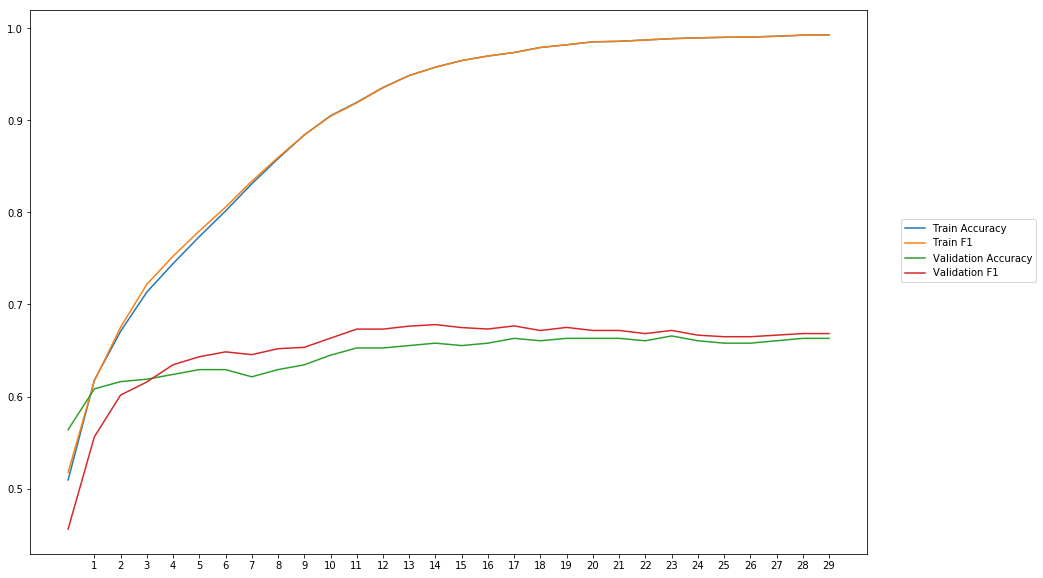

Average Accuracy: 64.52%
Average Precision: 63.70%
Average Recall: 66.96%
Average F1: 65.09%

-----Fold 5--------


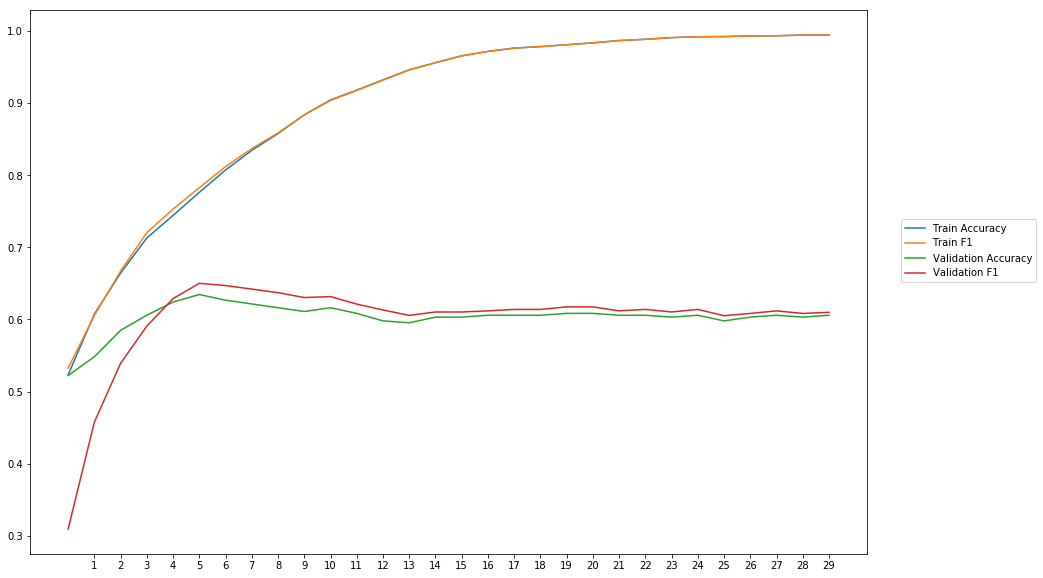

Average Accuracy: 60.30%
Average Precision: 59.94%
Average Recall: 60.79%
Average F1: 59.97%

-----Fold 6--------


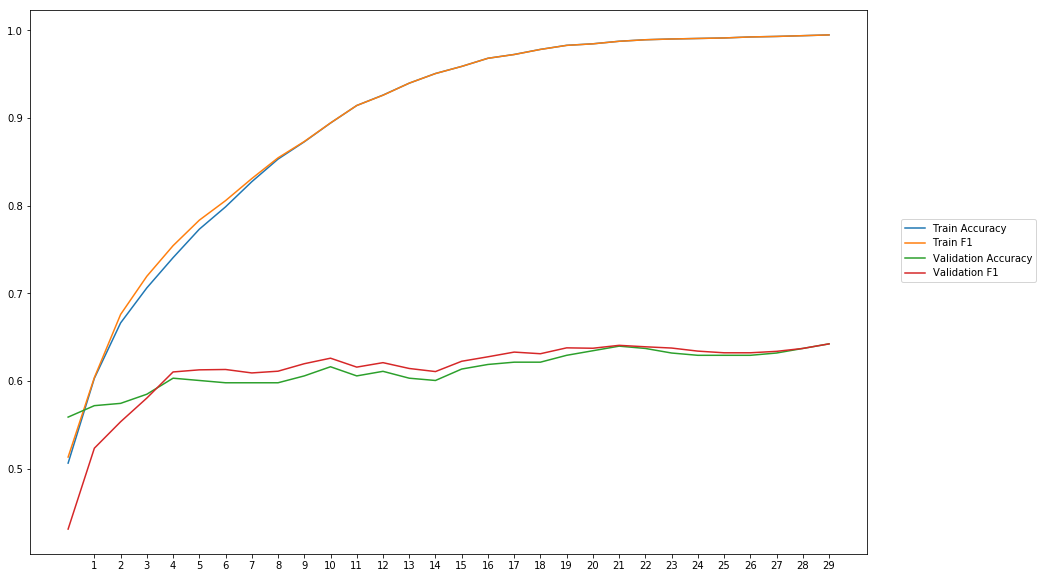

Average Accuracy: 61.25%
Average Precision: 60.98%
Average Recall: 61.85%
Average F1: 61.23%

-----Fold 7--------


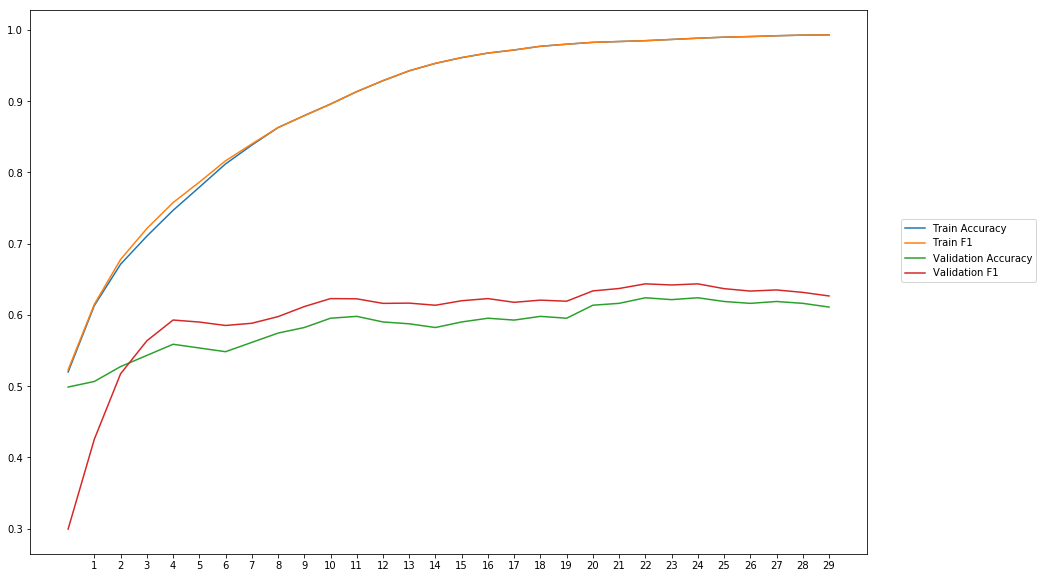

Average Accuracy: 58.53%
Average Precision: 57.48%
Average Recall: 62.91%
Average F1: 59.75%

-----Fold 8--------


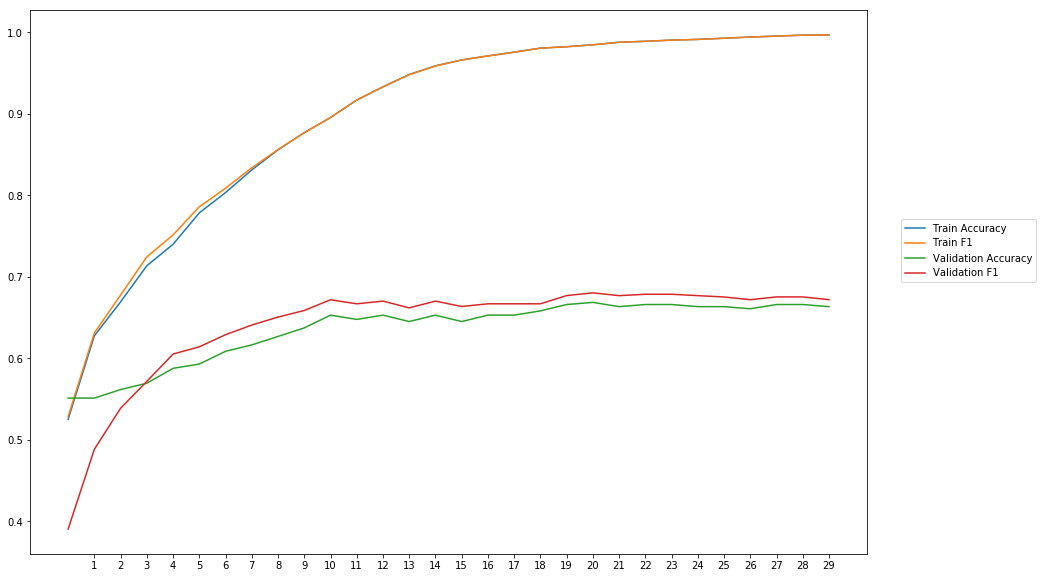

Average Accuracy: 63.57%
Average Precision: 62.64%
Average Recall: 66.21%
Average F1: 64.08%

-----Fold 9--------


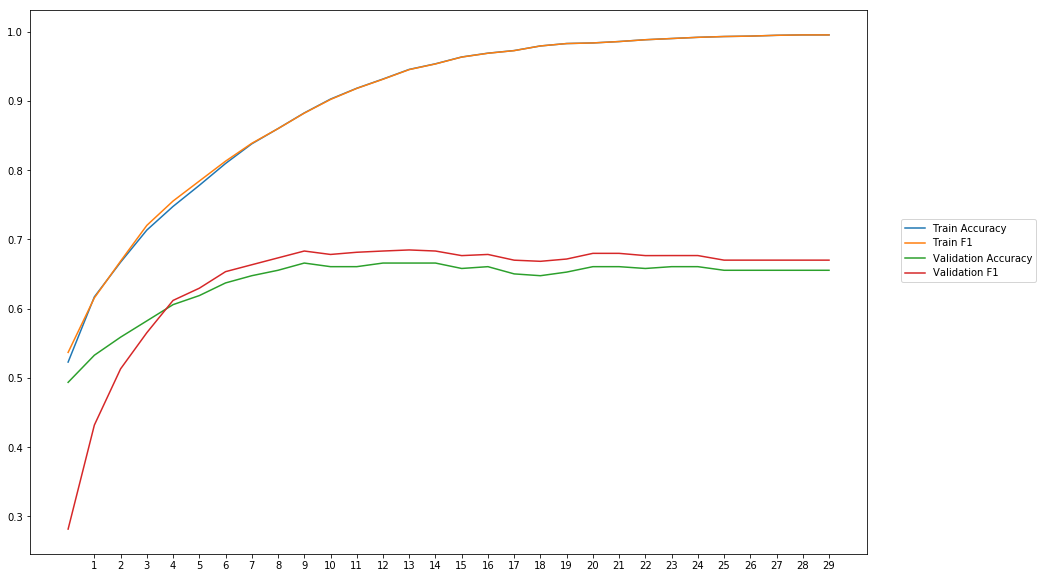

Average Accuracy: 63.87%
Average Precision: 62.56%
Average Recall: 66.46%
Average F1: 64.07%

-----Fold 10--------


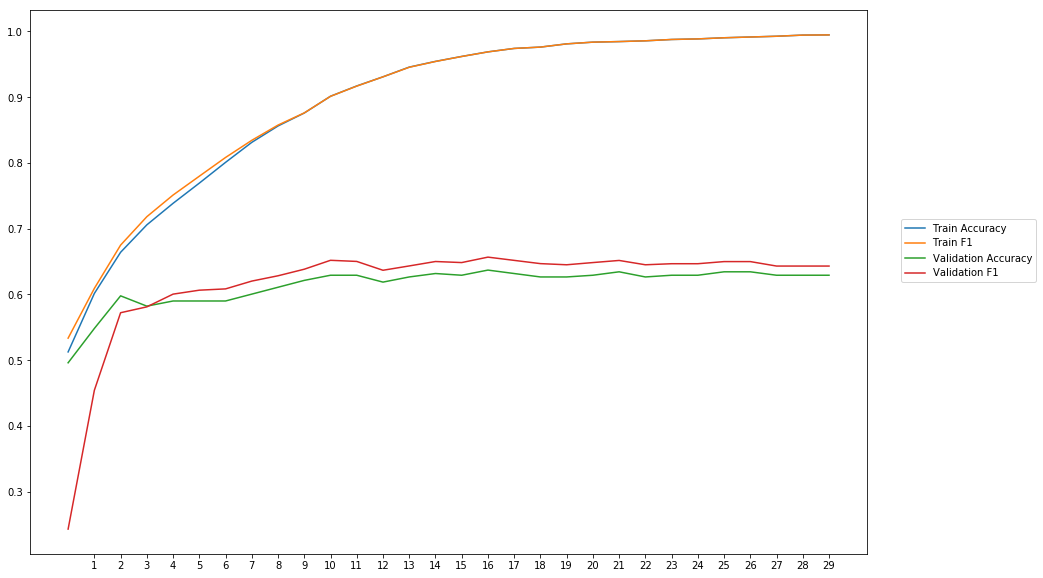

Average Accuracy: 61.40%
Average Precision: 60.39%
Average Recall: 63.93%
Average F1: 61.68%

-------Overallresults-------


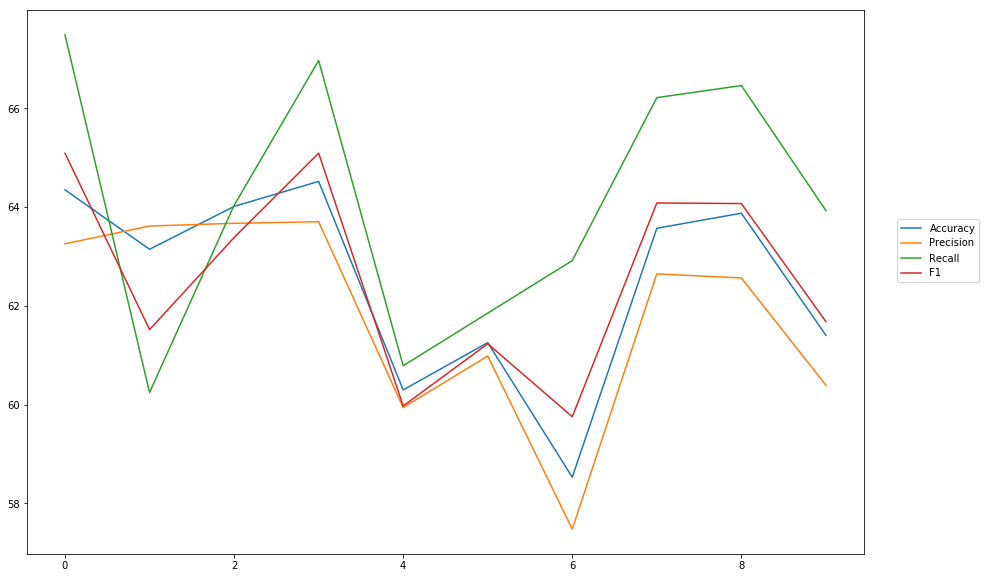

Accuracy: Mean = 62.49% (+/- 1.91%), Max = 64.52%, Min =  58.53%
Precision: Mean = 61.82% (+/- 1.96%), Max = 63.70%, Min =  57.48%
Recall: Mean = 64.09% (+/- 2.49%), Max = 67.48%, Min =  60.24%
F1: Mean = 62.59% (+/- 1.90%), Max = 65.09%, Min =  59.75%


In [19]:
cross_val_three_inputs(model_minmax, NUM_EPOCHS, BATCH_SIZE, optimizer, lossfunction, train_data, train_senti_blob, train_pos, train_labels, softmax, outputpath, 'MinMax')

### MinMax -1 to 1

In [21]:
#First part
wv_layer_minmaxneg = Embedding(len(word_index)+1,
                 EMBEDDING_DIM,
                 weights=[embedding_matrix],
                 input_length=MAX_SEQUENCE_LENGTH,
                 trainable=True)

comment_input_minmaxneg = Input(shape=(MAX_SEQUENCE_LENGTH,), dtype='float32')
embedded_sequences_minmaxneg = wv_layer_minmaxneg(comment_input_minmaxneg)
x_first_minmaxneg = Dense(600, activation='relu', kernel_constraint=min_max_norm(min_value=-1.0, max_value=1.0))(embedded_sequences_minmaxneg)
x_first_minmaxneg = Flatten()(x_first_minmaxneg)

#Second part
senti_input_minmaxneg_blob = Input(shape=(MAX_SEQUENCE_LENGTH,), dtype='float')
x_second_minmaxneg = Dense(600, activation='relu', kernel_constraint=min_max_norm(min_value=-1.0, max_value=1.0))(senti_input_minmaxneg_blob)

#Thrid part
senti_input_minmaxneg_pos = Input(shape=(MAX_SEQUENCE_LENGTH,), dtype='float')
x_third_minmaxneg = Dense(600, activation='relu', kernel_constraint=min_max_norm(min_value=-1.0, max_value=1.0))(senti_input_minmaxneg_pos)

#Concatination
concat_minmaxneg = concatenate([x_first_minmaxneg, x_second_minmaxneg, x_third_minmaxneg])

preds_minmaxneg = Dense(2, activation='softmax')(concat_minmaxneg)

model_minmaxneg = Model(inputs=[comment_input_minmaxneg, senti_input_minmaxneg_blob, senti_input_minmaxneg_pos], outputs=preds_minmaxneg)
model_minmaxneg.summary()

__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_21 (InputLayer)           (None, 40)           0                                            
__________________________________________________________________________________________________
embedding_9 (Embedding)         (None, 40, 300)      4118700     input_21[0][0]                   
__________________________________________________________________________________________________
dense_20 (Dense)                (None, 40, 600)      180600      embedding_9[0][0]                
__________________________________________________________________________________________________
input_22 (InputLayer)           (None, 40)           0                                            
__________________________________________________________________________________________________
input_23 (


-----Fold 1--------


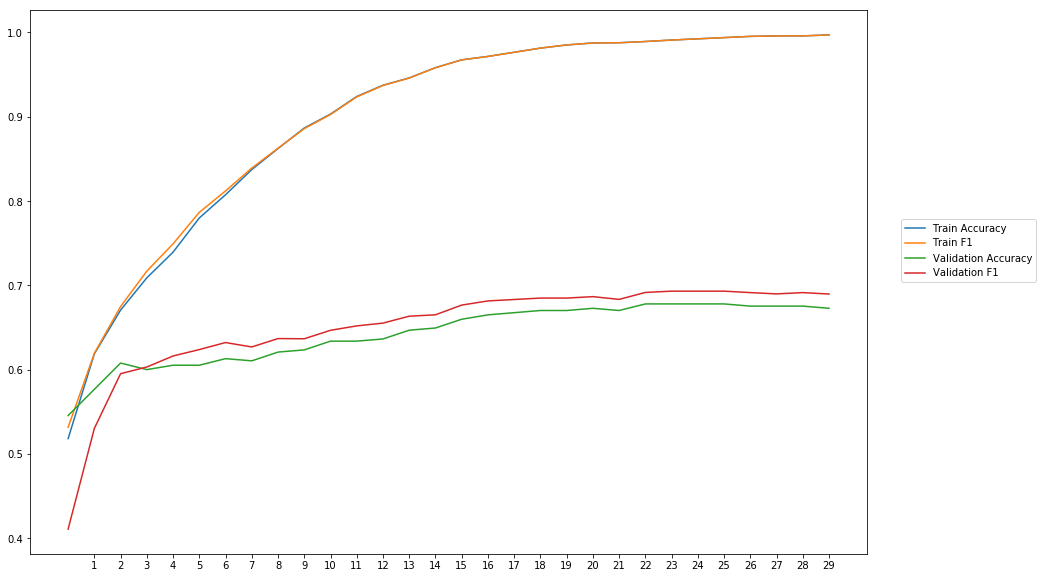

Average Accuracy: 64.31%
Average Precision: 63.22%
Average Recall: 67.40%
Average F1: 65.02%

-----Fold 2--------


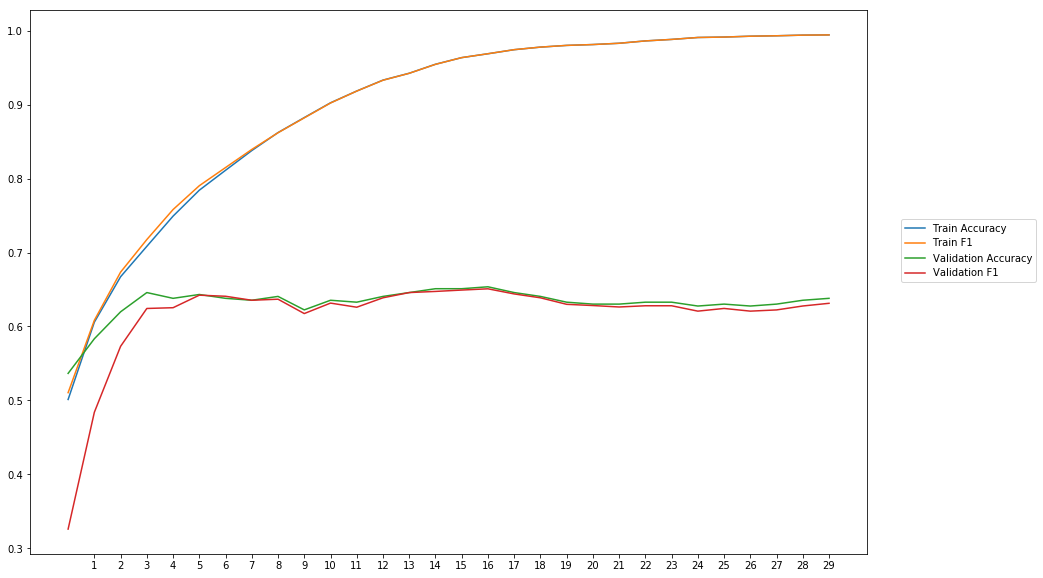

Average Accuracy: 63.16%
Average Precision: 63.61%
Average Recall: 60.30%
Average F1: 61.55%

-----Fold 3--------


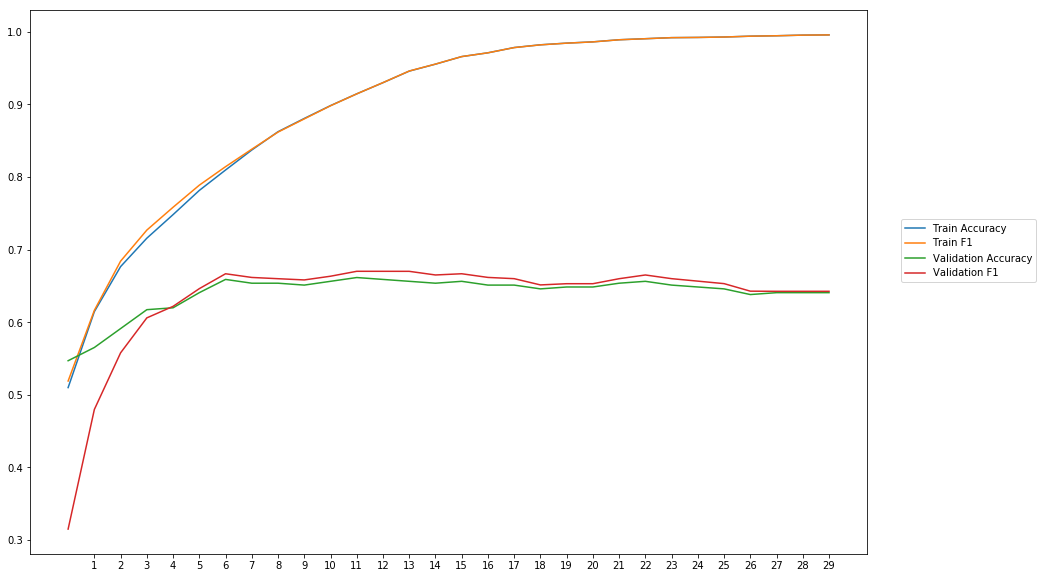

Average Accuracy: 64.00%
Average Precision: 63.64%
Average Recall: 64.10%
Average F1: 63.40%

-----Fold 4--------


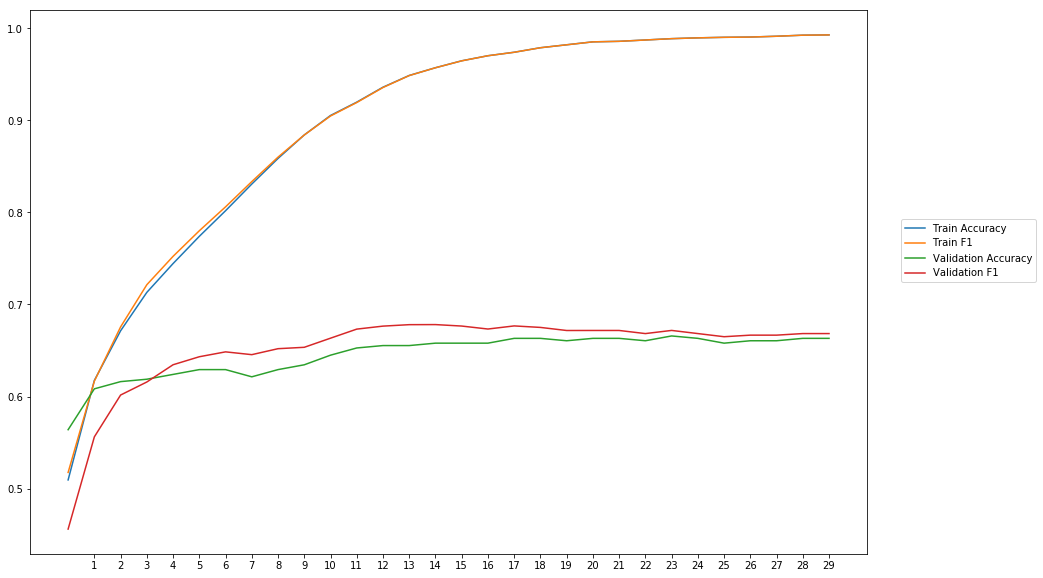

Average Accuracy: 64.55%
Average Precision: 63.73%
Average Recall: 67.00%
Average F1: 65.12%

-----Fold 5--------


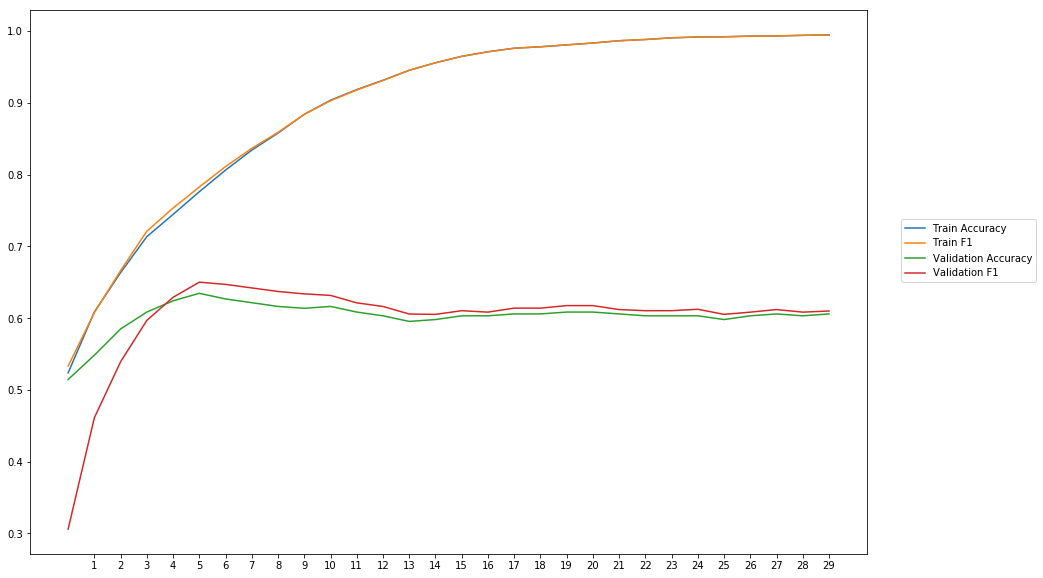

Average Accuracy: 60.26%
Average Precision: 59.85%
Average Recall: 60.80%
Average F1: 59.97%

-----Fold 6--------


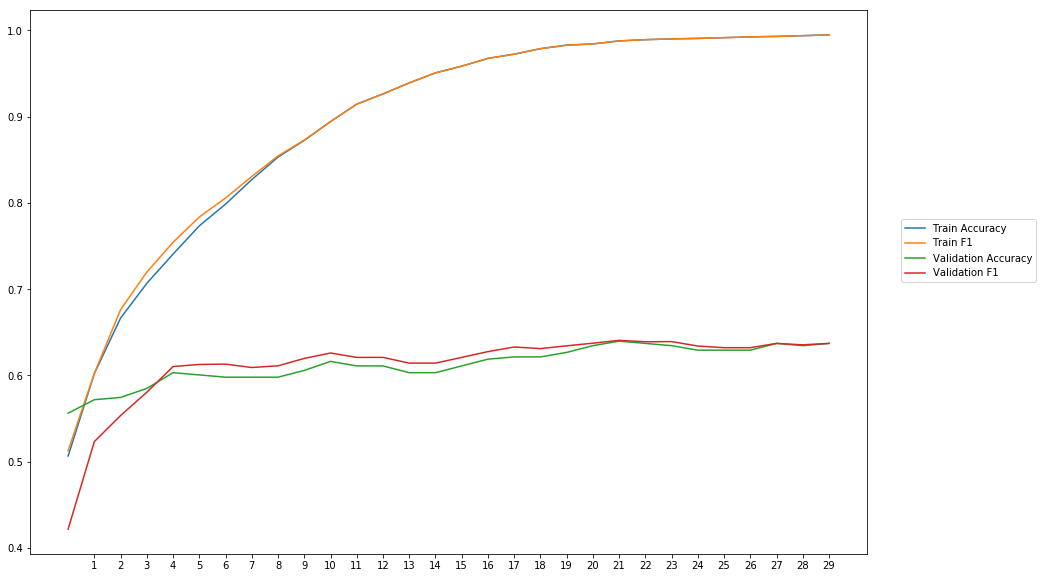

Average Accuracy: 61.25%
Average Precision: 60.99%
Average Recall: 61.82%
Average F1: 61.20%

-----Fold 7--------


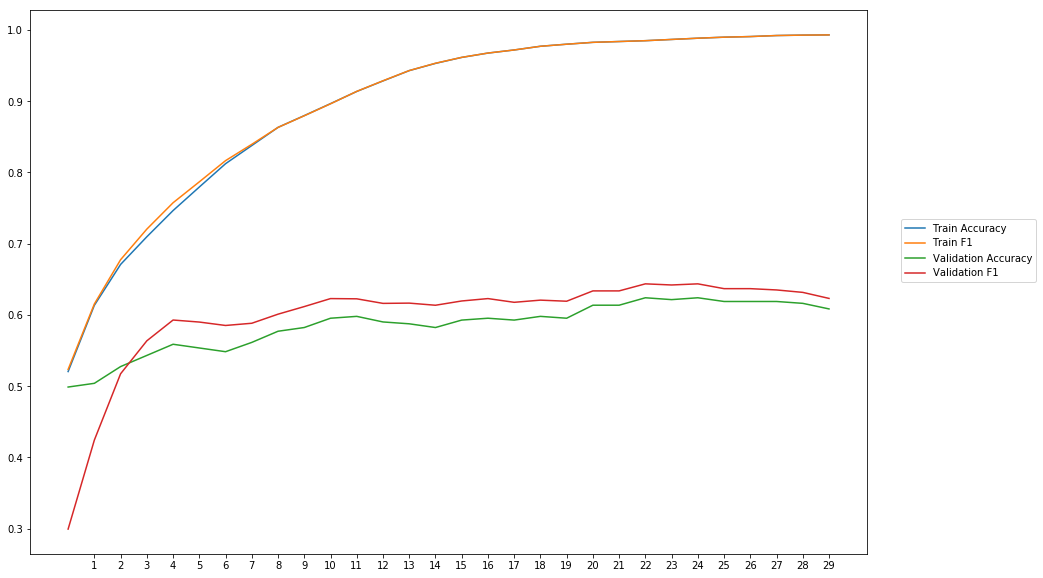

Average Accuracy: 58.53%
Average Precision: 57.48%
Average Recall: 62.90%
Average F1: 59.75%

-----Fold 8--------


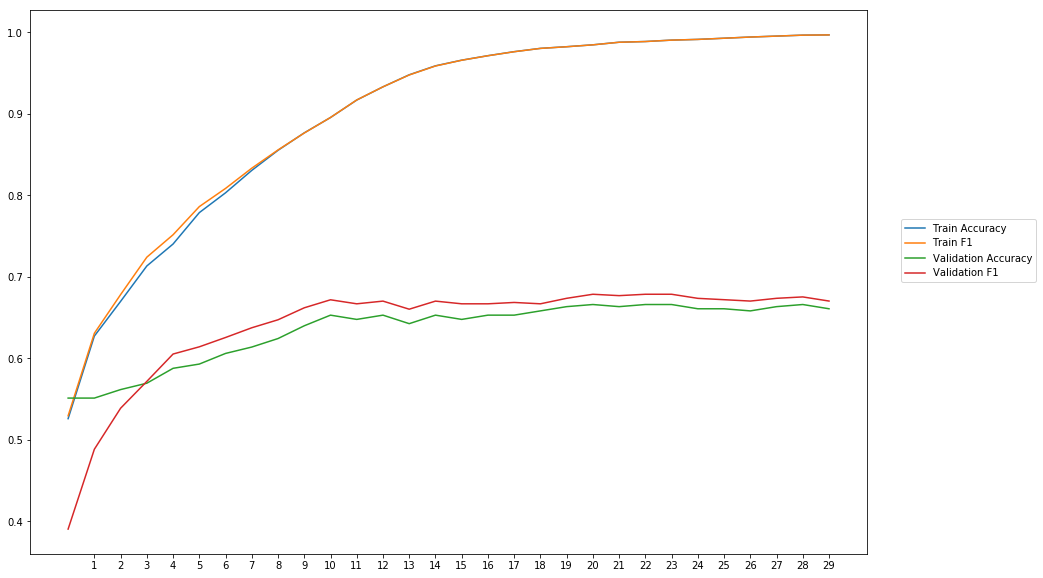

Average Accuracy: 63.49%
Average Precision: 62.56%
Average Recall: 66.16%
Average F1: 64.01%

-----Fold 9--------


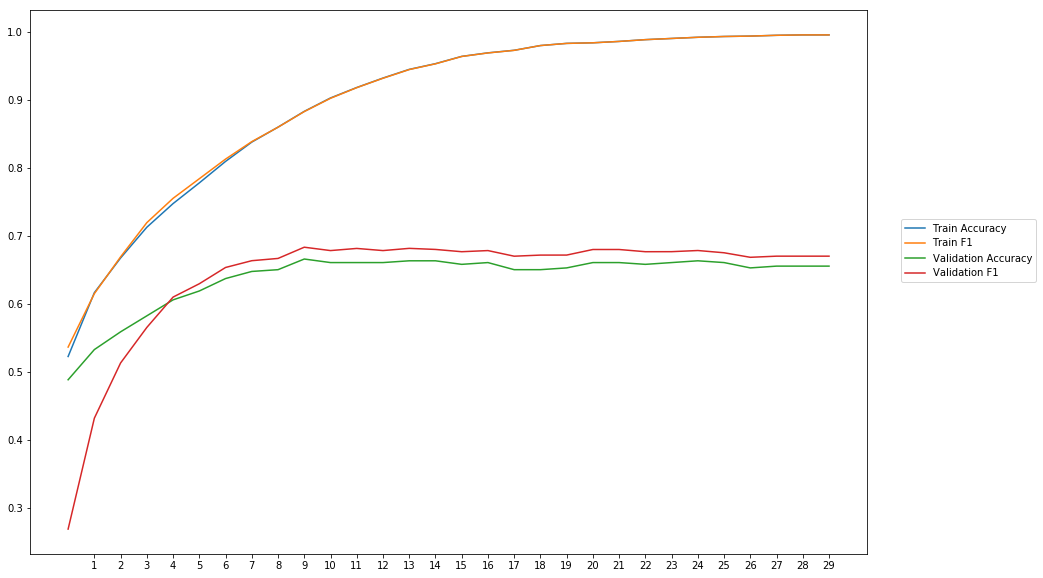

Average Accuracy: 63.83%
Average Precision: 62.50%
Average Recall: 66.35%
Average F1: 63.99%

-----Fold 10--------


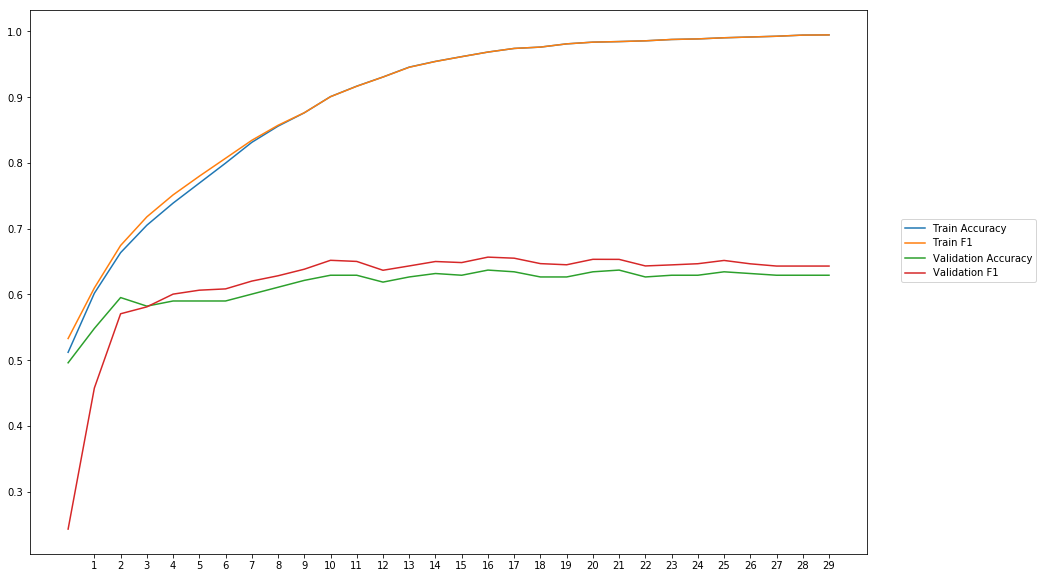

Average Accuracy: 61.42%
Average Precision: 60.40%
Average Recall: 63.94%
Average F1: 61.70%

-------Overallresults-------


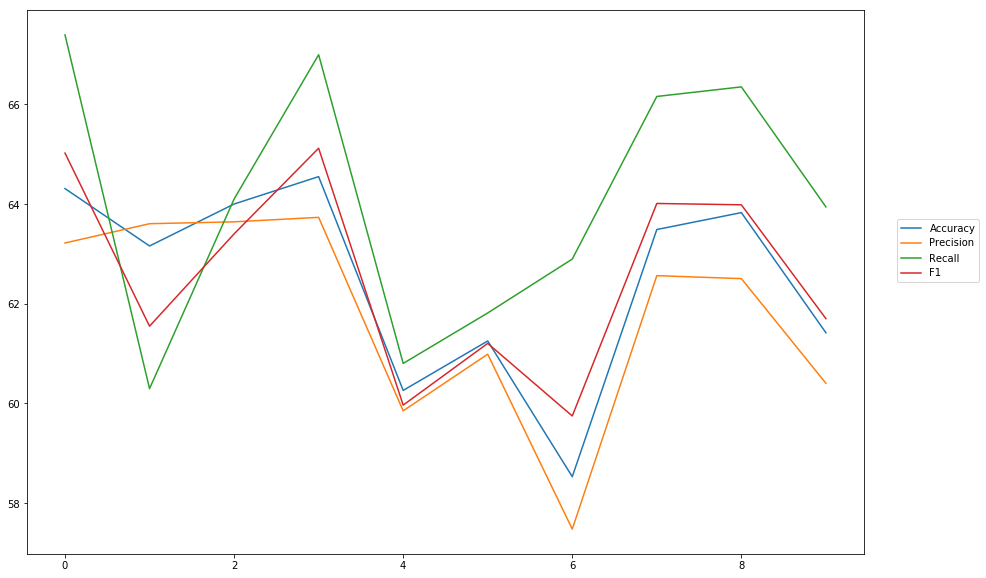

Accuracy: Mean = 62.48% (+/- 1.91%), Max = 64.55%, Min =  58.53%
Precision: Mean = 61.80% (+/- 1.96%), Max = 63.73%, Min =  57.48%
Recall: Mean = 64.08% (+/- 2.46%), Max = 67.40%, Min =  60.30%
F1: Mean = 62.57% (+/- 1.89%), Max = 65.12%, Min =  59.75%


In [22]:
cross_val_three_inputs(model_minmaxneg, NUM_EPOCHS, BATCH_SIZE, optimizer, lossfunction, train_data, train_senti_blob, train_pos, train_labels, softmax, outputpath, 'MinMaxNeg')

### MaxNorm

In [24]:
#First part
wv_layer_max = Embedding(len(word_index)+1,
                 EMBEDDING_DIM,
                 weights=[embedding_matrix],
                 input_length=MAX_SEQUENCE_LENGTH,
                 trainable=True)

comment_input_max = Input(shape=(MAX_SEQUENCE_LENGTH,), dtype='float32')
embedded_sequences_max = wv_layer_max(comment_input_max)
x_first_max = Dense(600, activation='relu', kernel_constraint=max_norm())(embedded_sequences_max)
x_first_max = Flatten()(x_first_max)

#Second part
senti_input_max_blob = Input(shape=(MAX_SEQUENCE_LENGTH,), dtype='float')
x_second_max = Dense(600, activation='relu', kernel_constraint=max_norm())(senti_input_max_blob)

#Thrid part
senti_input_max_pos = Input(shape=(MAX_SEQUENCE_LENGTH,), dtype='float')
x_third_max = Dense(600, activation='relu', kernel_constraint=max_norm())(senti_input_max_pos)

#Concatination
concat_max = concatenate([x_first_max, x_second_max, x_third_max])

preds_max = Dense(2, activation='softmax')(concat_max)

model_max = Model(inputs=[comment_input_max, senti_input_max_blob, senti_input_max_pos], outputs=preds_max)
model_max.summary()

__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_27 (InputLayer)           (None, 40)           0                                            
__________________________________________________________________________________________________
embedding_11 (Embedding)        (None, 40, 300)      4118700     input_27[0][0]                   
__________________________________________________________________________________________________
dense_28 (Dense)                (None, 40, 600)      180600      embedding_11[0][0]               
__________________________________________________________________________________________________
input_28 (InputLayer)           (None, 40)           0                                            
__________________________________________________________________________________________________
input_29 (


-----Fold 1--------


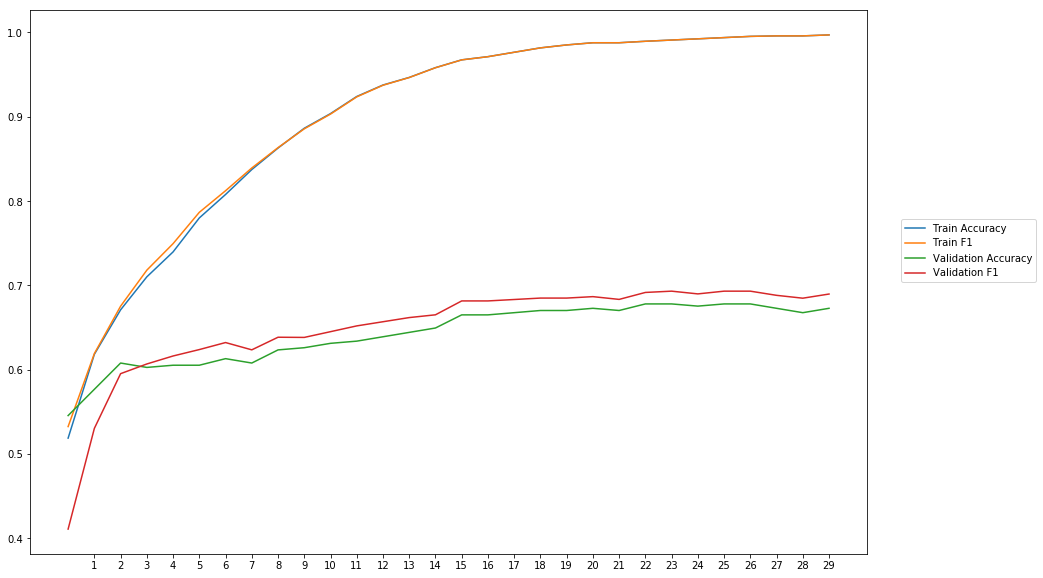

Average Accuracy: 64.30%
Average Precision: 63.21%
Average Recall: 67.38%
Average F1: 65.01%

-----Fold 2--------


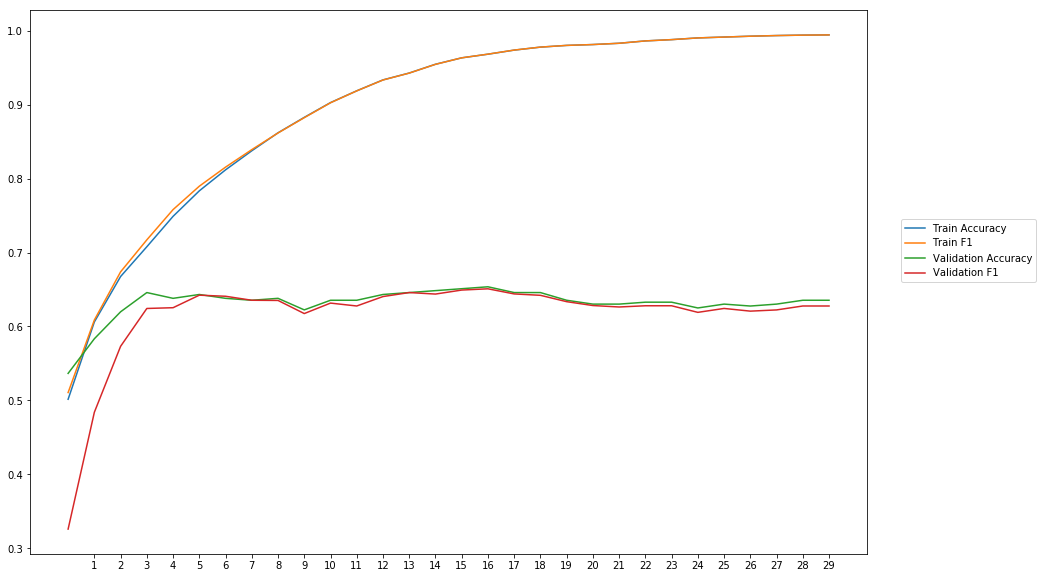

Average Accuracy: 63.17%
Average Precision: 63.62%
Average Recall: 60.28%
Average F1: 61.55%

-----Fold 3--------


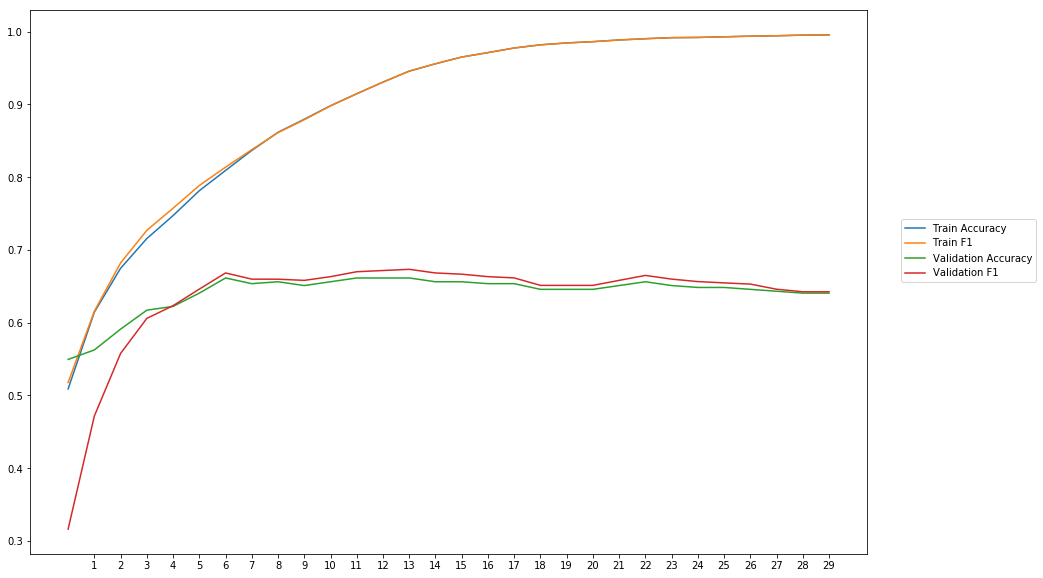

Average Accuracy: 64.10%
Average Precision: 63.78%
Average Recall: 64.12%
Average F1: 63.46%

-----Fold 4--------


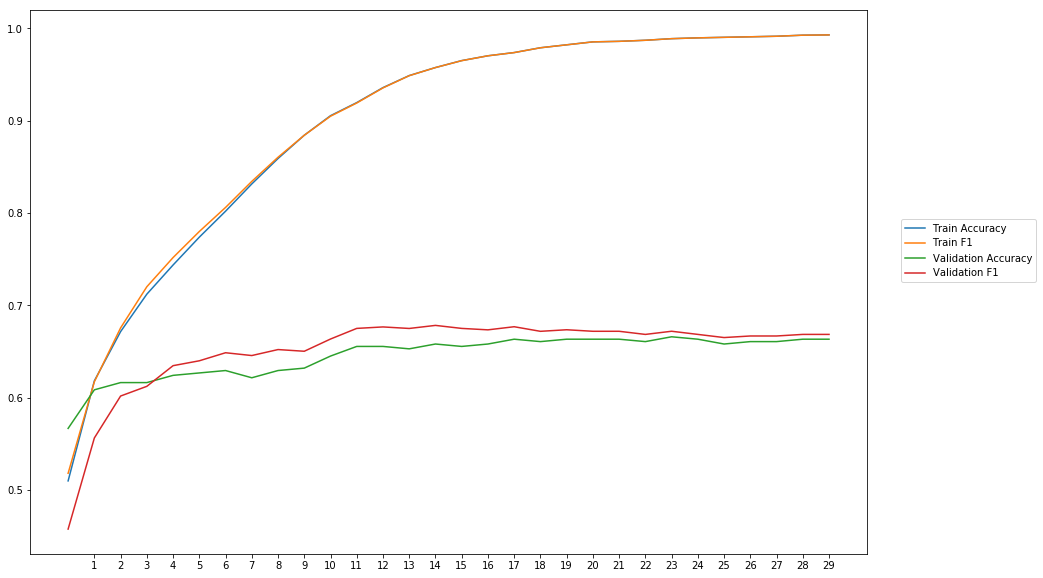

Average Accuracy: 64.53%
Average Precision: 63.73%
Average Recall: 66.91%
Average F1: 65.08%

-----Fold 5--------


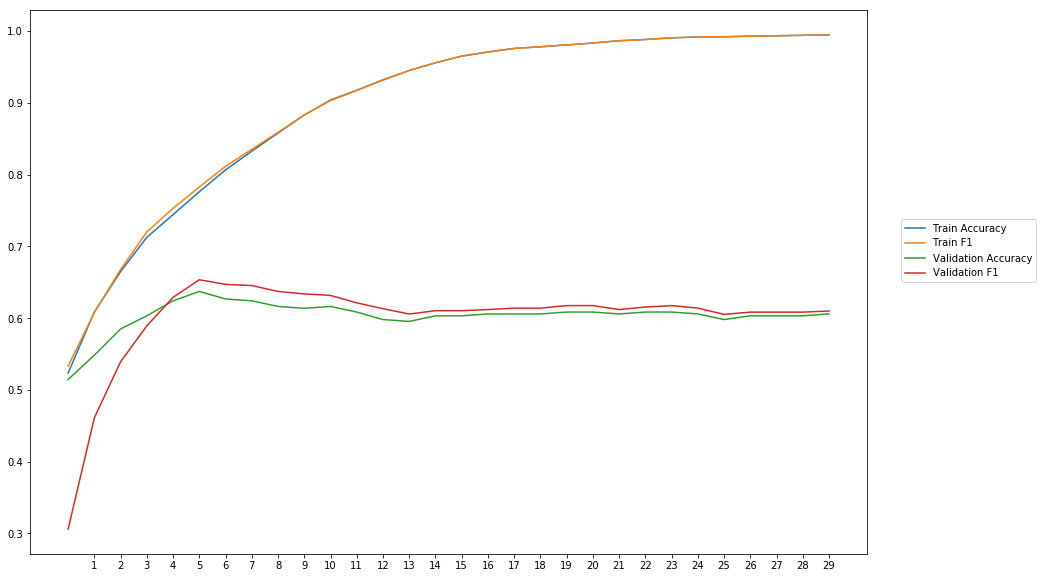

Average Accuracy: 60.30%
Average Precision: 59.89%
Average Recall: 60.87%
Average F1: 60.02%

-----Fold 6--------


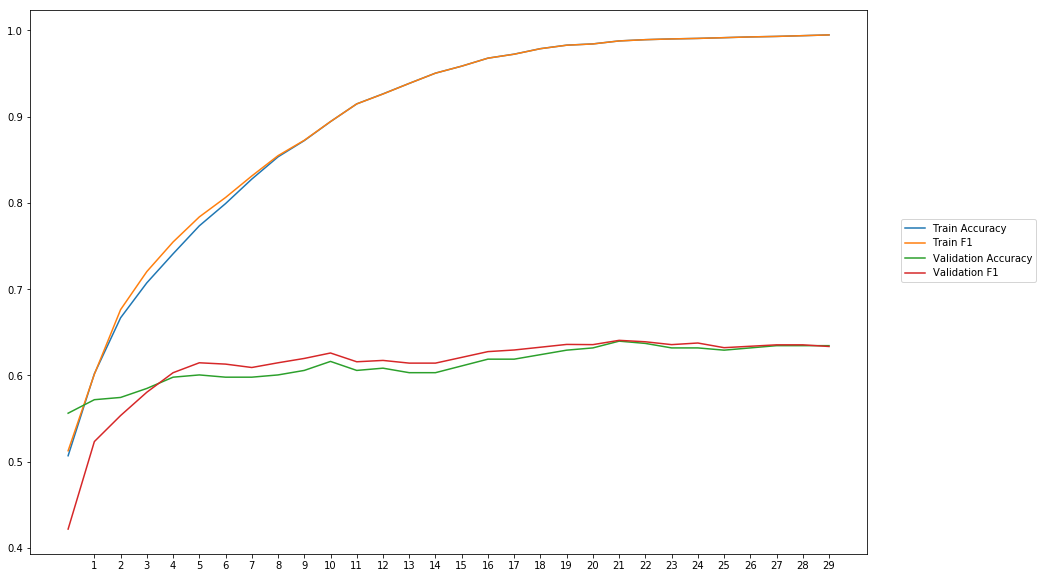

Average Accuracy: 61.21%
Average Precision: 60.95%
Average Recall: 61.75%
Average F1: 61.15%

-----Fold 7--------


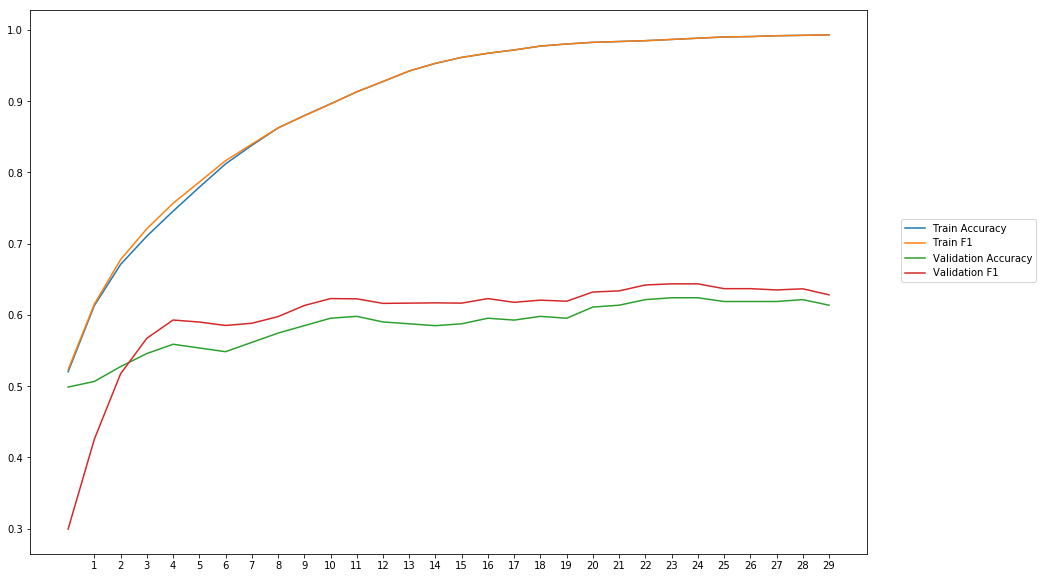

Average Accuracy: 58.56%
Average Precision: 57.51%
Average Recall: 62.95%
Average F1: 59.79%

-----Fold 8--------


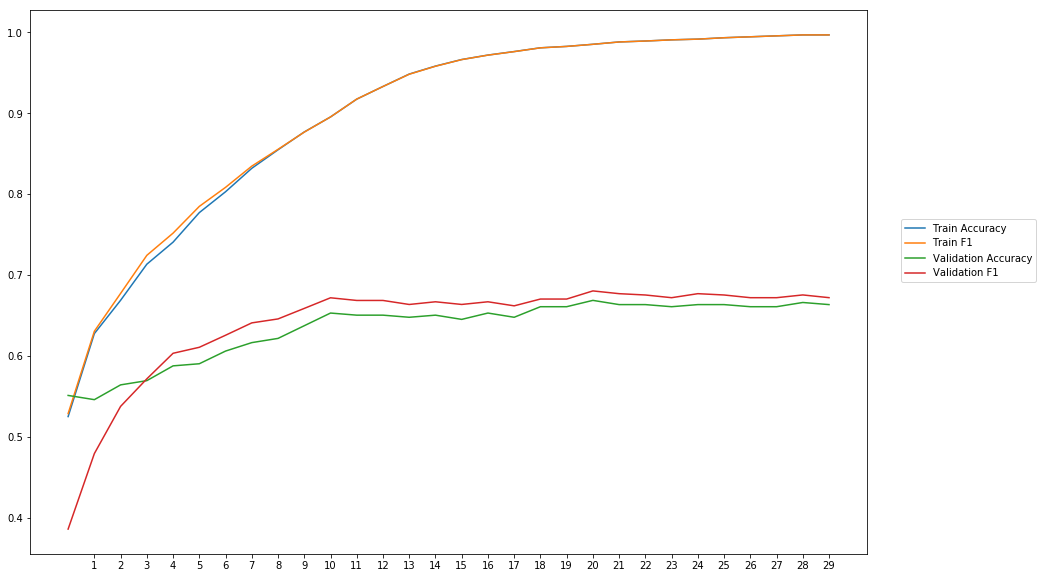

Average Accuracy: 63.46%
Average Precision: 62.56%
Average Recall: 65.97%
Average F1: 63.91%

-----Fold 9--------


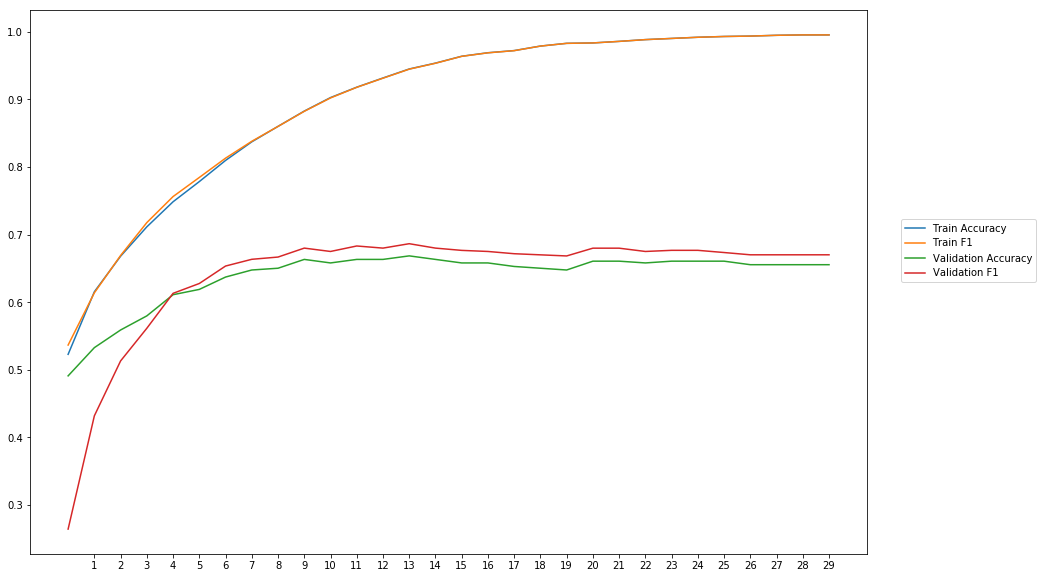

Average Accuracy: 63.85%
Average Precision: 62.56%
Average Recall: 66.21%
Average F1: 63.94%

-----Fold 10--------


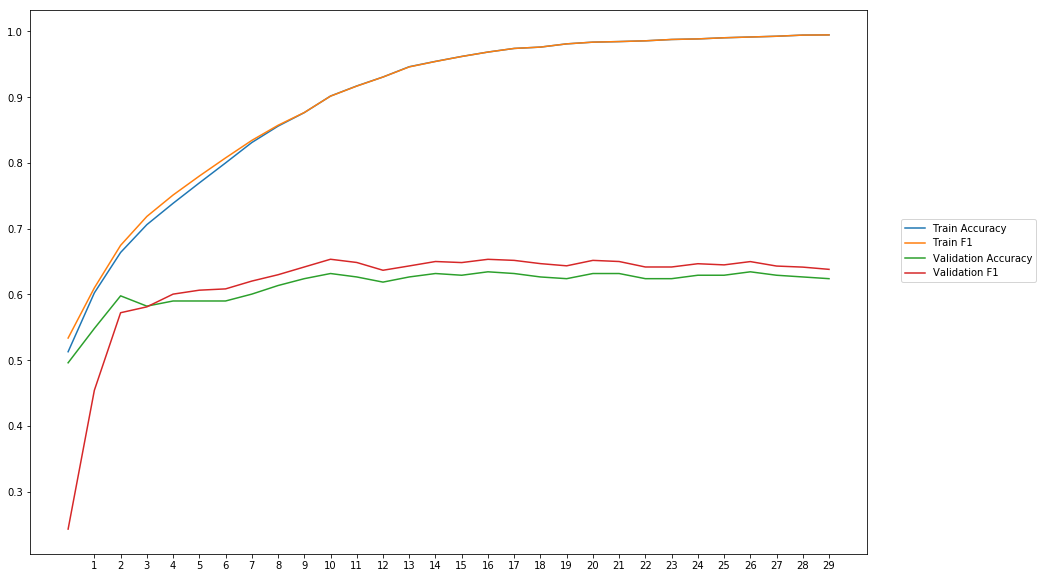

Average Accuracy: 61.33%
Average Precision: 60.32%
Average Recall: 63.87%
Average F1: 61.62%

-------Overallresults-------


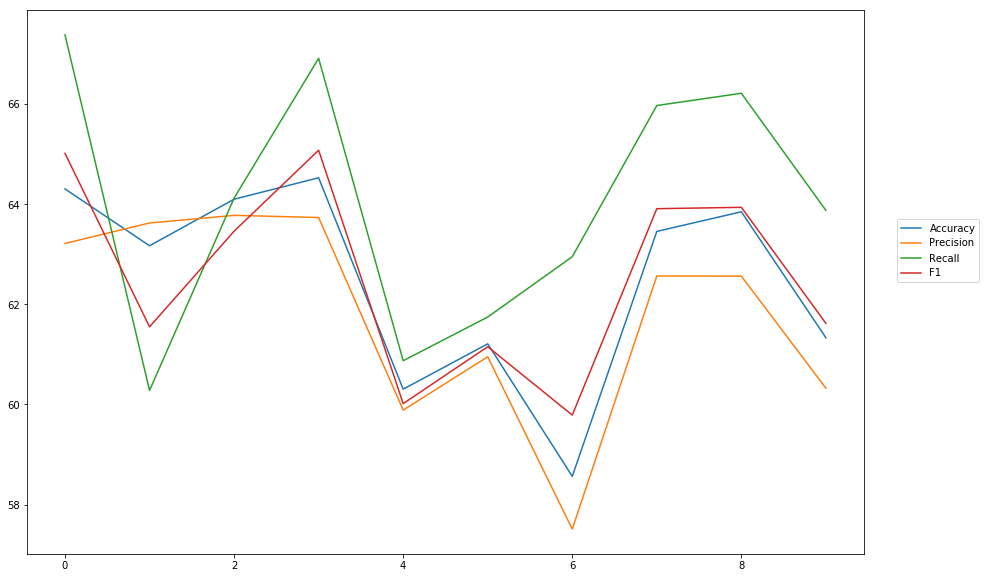

Accuracy: Mean = 62.48% (+/- 1.91%), Max = 64.53%, Min =  58.56%
Precision: Mean = 61.81% (+/- 1.98%), Max = 63.78%, Min =  57.51%
Recall: Mean = 64.03% (+/- 2.42%), Max = 67.38%, Min =  60.28%
F1: Mean = 62.55% (+/- 1.87%), Max = 65.08%, Min =  59.79%


In [25]:
cross_val_three_inputs(model_max, NUM_EPOCHS, BATCH_SIZE, optimizer, lossfunction, train_data, train_senti_blob, train_pos, train_labels, softmax, outputpath, 'MaxNorm')

### UnitNorm

In [30]:
#First part
wv_layer_unit = Embedding(len(word_index)+1,
                 EMBEDDING_DIM,
                 weights=[embedding_matrix],
                 input_length=MAX_SEQUENCE_LENGTH,
                 trainable=True)

comment_input_unit = Input(shape=(MAX_SEQUENCE_LENGTH,), dtype='float32')
embedded_sequences_unit = wv_layer_unit(comment_input_unit)
x_first_unit = Dense(600, activation='relu', kernel_constraint=unit_norm())(embedded_sequences_unit)
x_first_unit = Flatten()(x_first_unit)

#Second part
senti_input_unit_blob = Input(shape=(MAX_SEQUENCE_LENGTH,), dtype='float')
x_second_unit = Dense(600, activation='relu', kernel_constraint=unit_norm())(senti_input_unit_blob)

#Thrid part
senti_input_unit_pos = Input(shape=(MAX_SEQUENCE_LENGTH,), dtype='float')
x_third_unit = Dense(600, activation='relu', kernel_constraint=unit_norm())(senti_input_unit_pos)

#Concatination
concat_unit = concatenate([x_first_unit, x_second_unit, x_third_unit])

preds_unit = Dense(2, activation='softmax')(concat_unit)

model_unit = Model(inputs=[comment_input_unit, senti_input_unit_blob, senti_input_unit_pos], outputs=preds_unit)
model_unit.summary()

__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_33 (InputLayer)           (None, 40)           0                                            
__________________________________________________________________________________________________
embedding_13 (Embedding)        (None, 40, 300)      4118700     input_33[0][0]                   
__________________________________________________________________________________________________
dense_36 (Dense)                (None, 40, 600)      180600      embedding_13[0][0]               
__________________________________________________________________________________________________
input_34 (InputLayer)           (None, 40)           0                                            
__________________________________________________________________________________________________
input_35 (


-----Fold 1--------


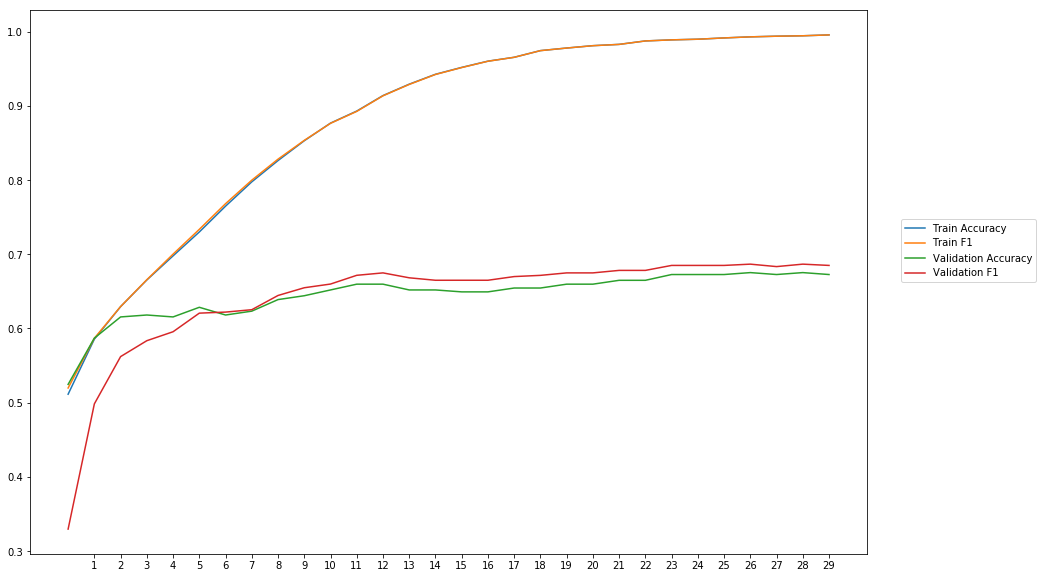

Average Accuracy: 64.54%
Average Precision: 64.03%
Average Recall: 65.19%
Average F1: 64.17%

-----Fold 2--------


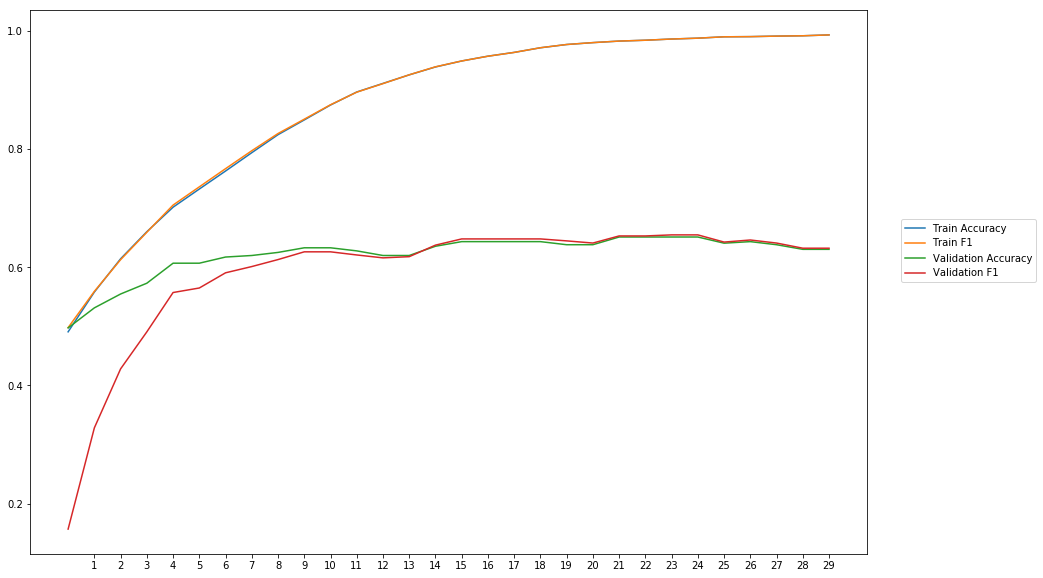

Average Accuracy: 62.12%
Average Precision: 62.35%
Average Recall: 57.87%
Average F1: 59.20%

-----Fold 3--------


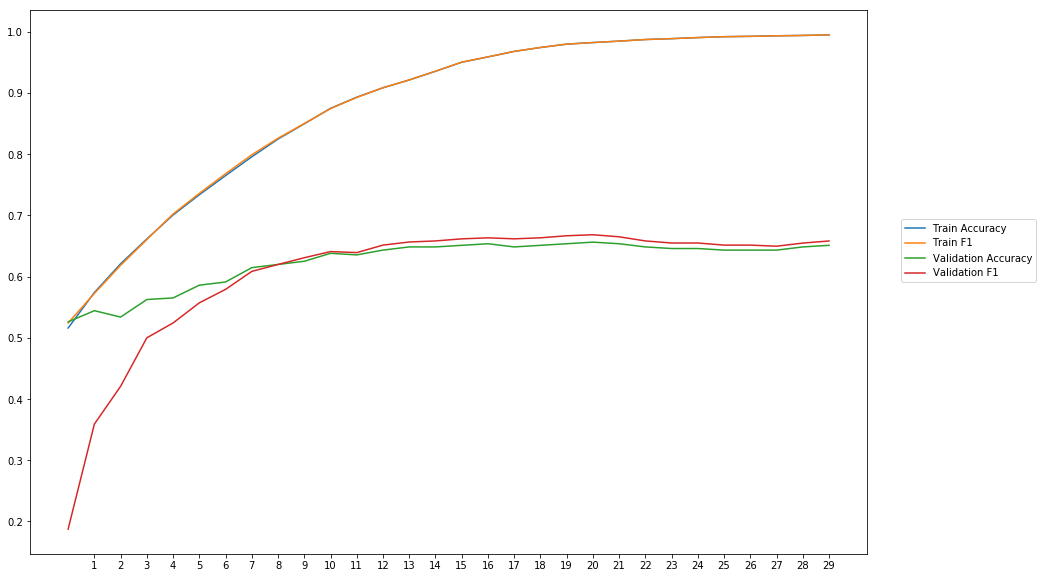

Average Accuracy: 62.40%
Average Precision: 62.39%
Average Recall: 60.44%
Average F1: 60.39%

-----Fold 4--------


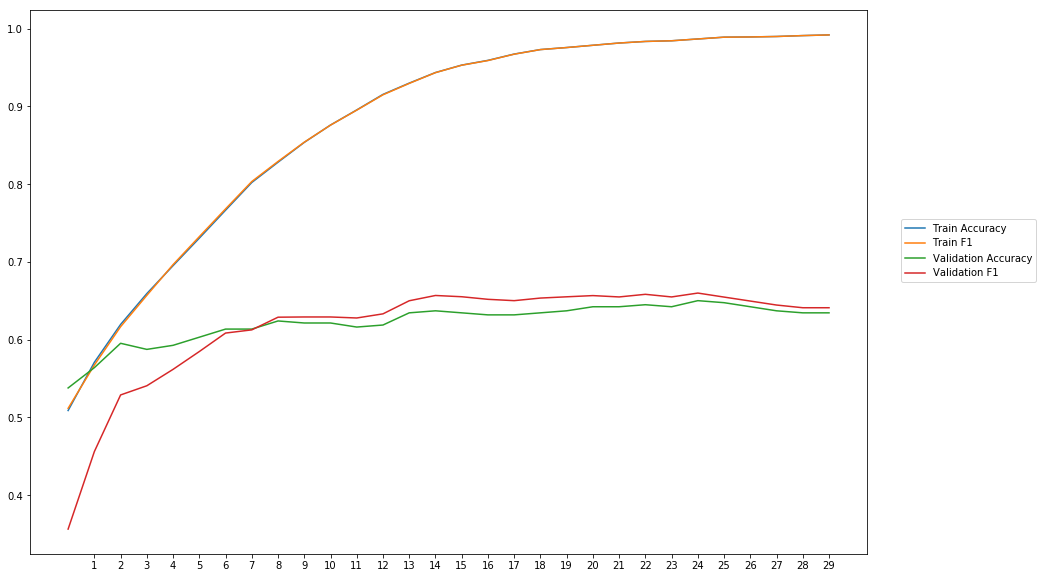

Average Accuracy: 62.23%
Average Precision: 62.01%
Average Recall: 62.16%
Average F1: 61.62%

-----Fold 5--------


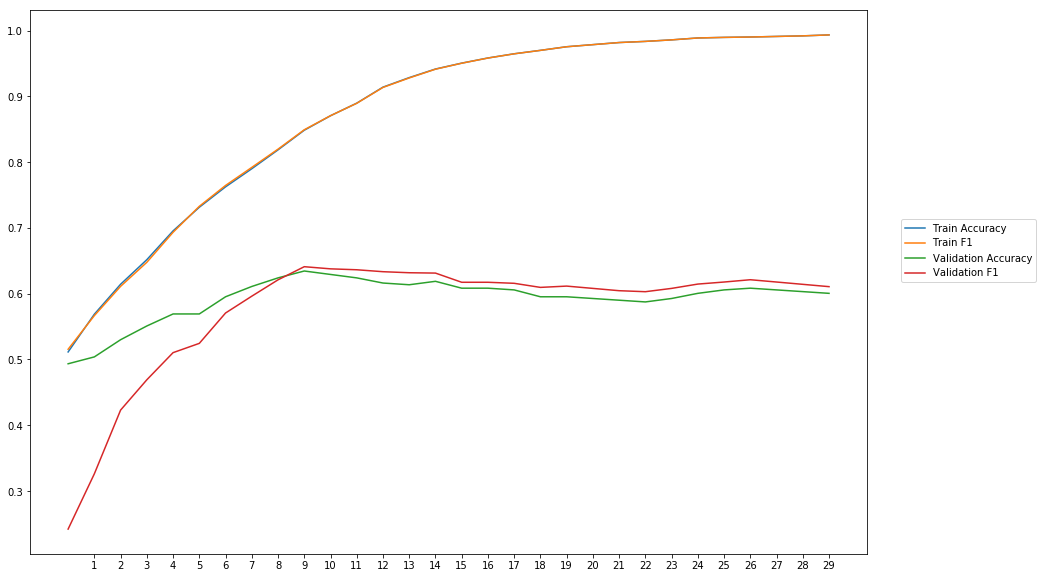

Average Accuracy: 59.28%
Average Precision: 58.96%
Average Recall: 57.59%
Average F1: 57.62%

-----Fold 6--------


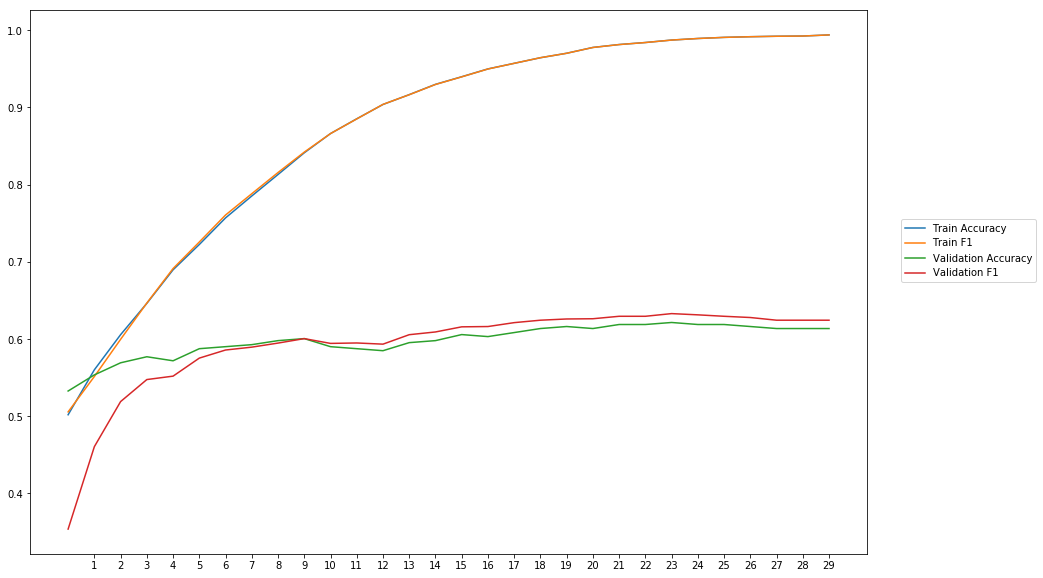

Average Accuracy: 59.81%
Average Precision: 59.65%
Average Recall: 59.42%
Average F1: 59.20%

-----Fold 7--------


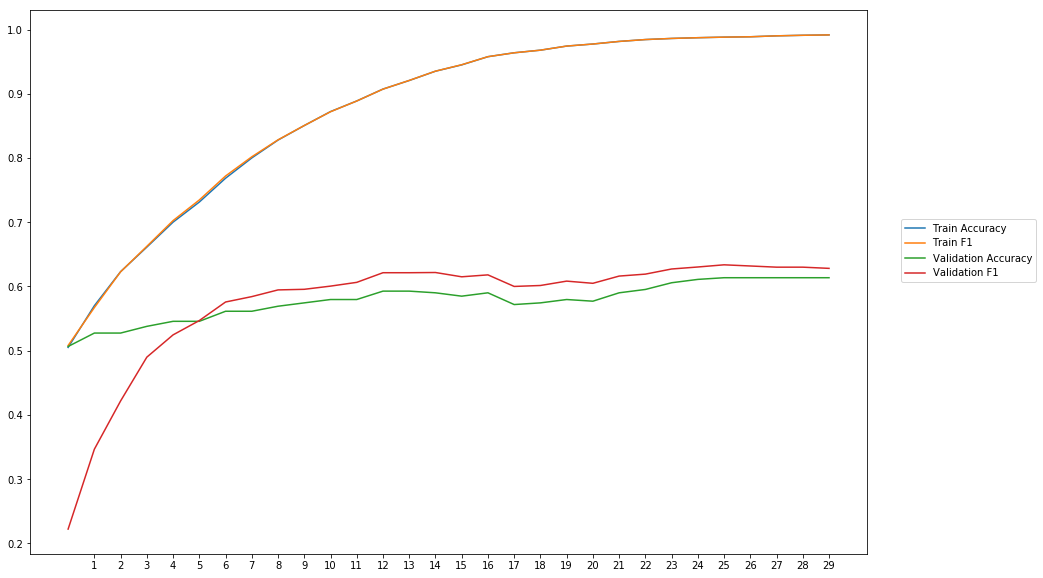

Average Accuracy: 57.80%
Average Precision: 57.14%
Average Recall: 59.63%
Average F1: 57.56%

-----Fold 8--------


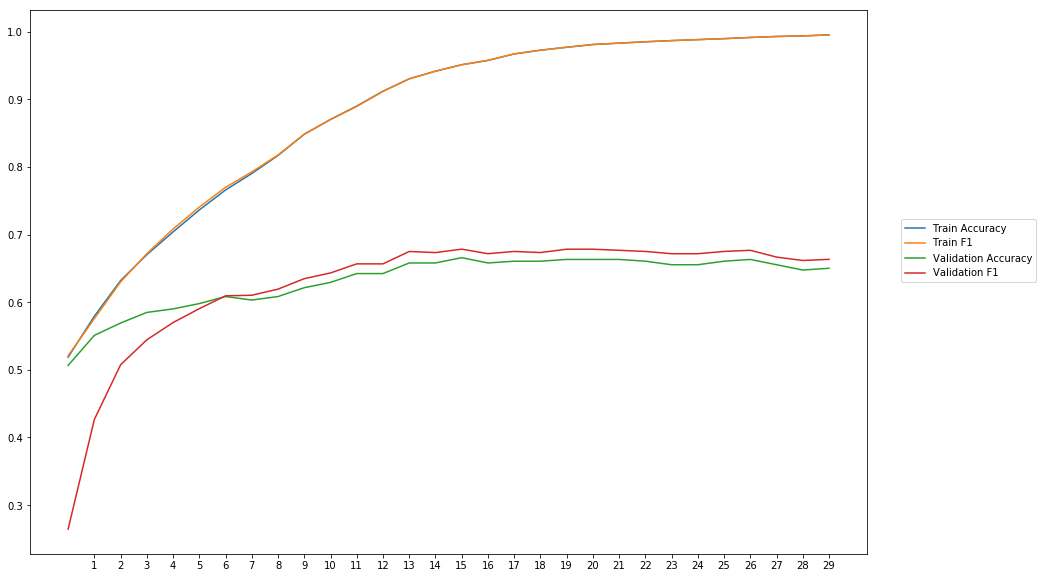

Average Accuracy: 63.18%
Average Precision: 62.47%
Average Recall: 63.77%
Average F1: 62.58%

-----Fold 9--------


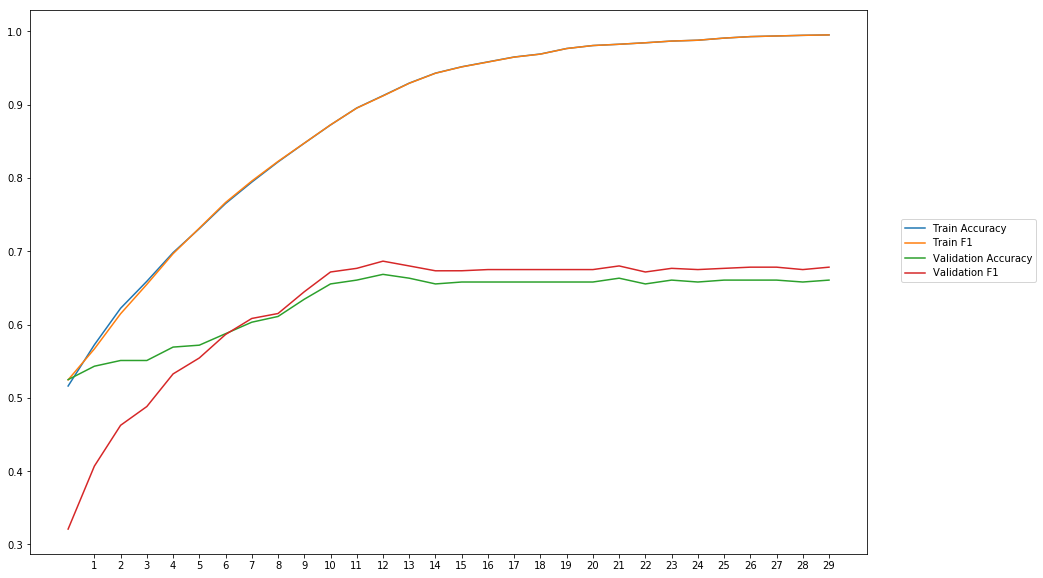

Average Accuracy: 63.12%
Average Precision: 62.35%
Average Recall: 63.80%
Average F1: 62.48%

-----Fold 10--------


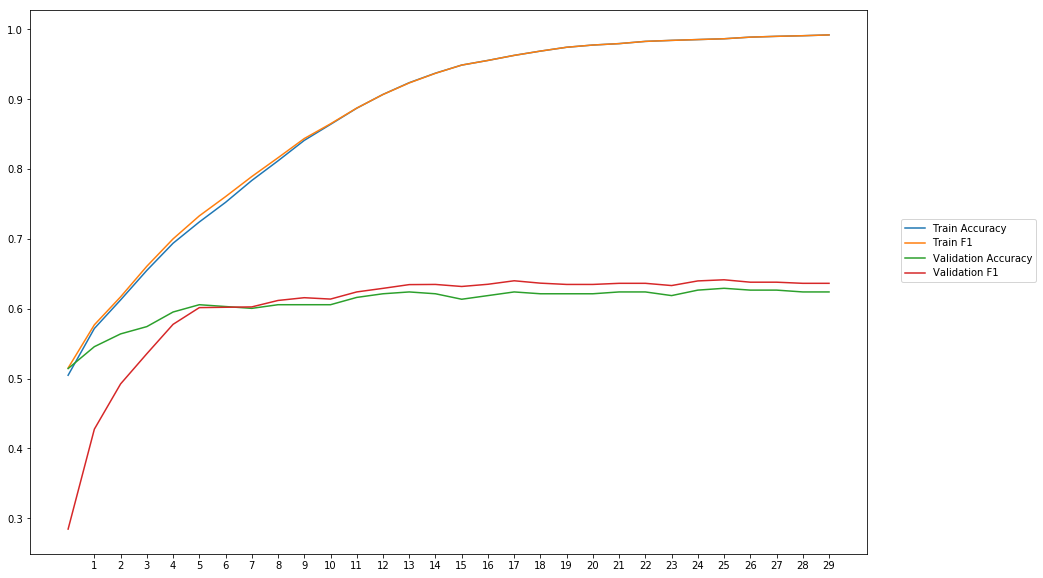

Average Accuracy: 60.83%
Average Precision: 60.47%
Average Recall: 60.75%
Average F1: 60.12%

-------Overallresults-------


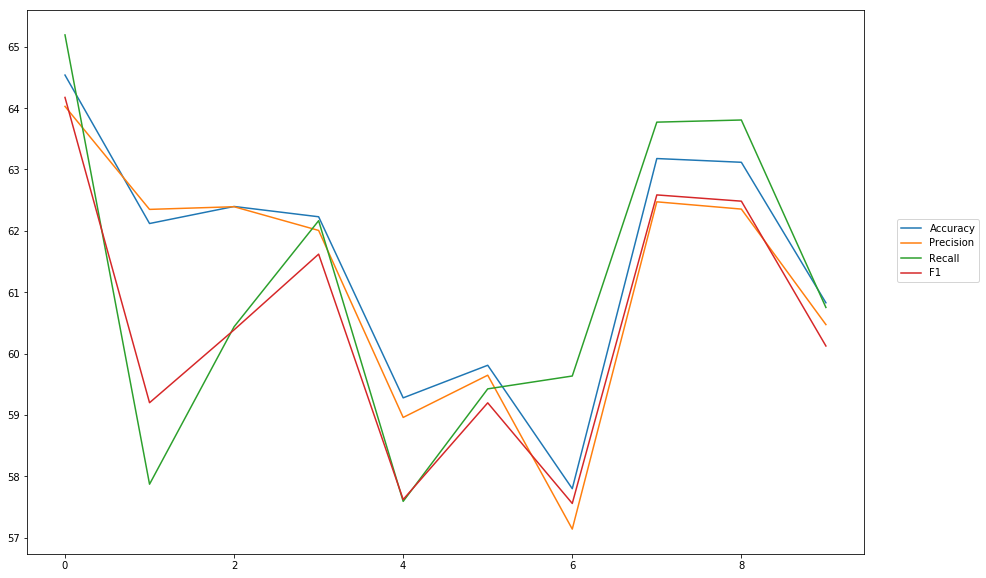

Accuracy: Mean = 61.53% (+/- 1.96%), Max = 64.54%, Min =  57.80%
Precision: Mean = 61.18% (+/- 1.97%), Max = 64.03%, Min =  57.14%
Recall: Mean = 61.06% (+/- 2.46%), Max = 65.19%, Min =  57.59%
F1: Mean = 60.49% (+/- 2.09%), Max = 64.17%, Min =  57.56%


In [31]:
cross_val_three_inputs(model_unit, NUM_EPOCHS, BATCH_SIZE, optimizer, lossfunction, train_data, train_senti_blob, train_pos, train_labels, softmax, outputpath, 'UnitNorm')

# Test the best model with heldout testdata

Instructions for updating:
Use tf.cast instead.


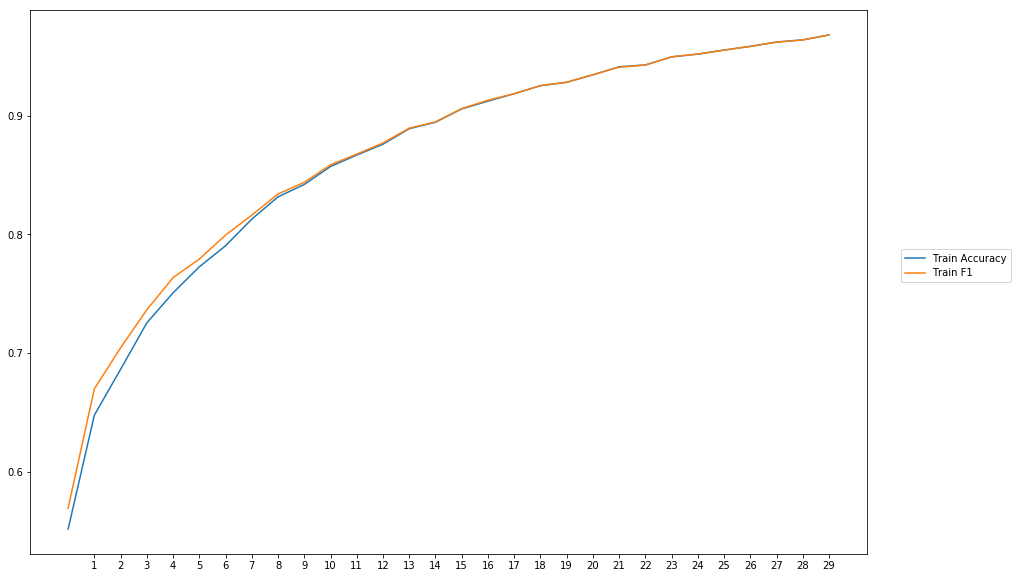


-----Test Scores----
Loss: 0.6049831606903855
Accuracy: 69.89795918367348
Precision: 59.842519669332674
Recall: 73.31189708253638
F1: 65.89594878934349


In [11]:
train_evaluate_three_inputs(model_minmax, NUM_EPOCHS, BATCH_SIZE, optimizer, lossfunction, train_data, train_senti_blob, train_pos, train_labels, test_data, test_senti_blob, test_pos, test_labels, softmax, outputpath, 'finalConstraint')